# Clustering of time series gas prices in Europe

# Data loading
Main source: [eurostat](https://ec.europa.eu/eurostat/web/main/home)

*   [Bi-annual gas prices for houssehold consumers from 2007](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=nrg_pc_202&lang=en)
*   [Bi-annual gas prices for non-household consumers from 2007](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=nrg_pc_203&lang=en)
*   [Bi-annual data for domestic consumers until 2007](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=nrg_pc_202_h&lang=en)
*   [Bi-annual data for industrial consumers until 2007](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=nrg_pc_203_h&lang=en)



In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
!pwd
import seaborn as sns
sns.set()

/content


In [2]:
# Dataset names in https://ec.europa.eu/eurostat/web/main/data/database

DOMESTIC_UNTIL_2007 = 'nrg_pc_202_h'
DOMESTIC_FROM_2007 = 'nrg_pc_202'

INDUSTRIAL_UNTIL_2007 = 'nrg_pc_203_h'
INDUSTRIAL_FROM_2007 = 'nrg_pc_203'

datasets_names = [
    DOMESTIC_UNTIL_2007, 
    DOMESTIC_FROM_2007,
    INDUSTRIAL_UNTIL_2007,
    INDUSTRIAL_FROM_2007
    ]

In [3]:
# Remove data from previous session
!rm -r eurostat_data

# Create a directory to store data from eurostat
!mkdir eurostat_data

In [4]:
# Download data from eurostat
for dataset in datasets_names:
  output_gz_file = f'eurostat_data/{dataset}.tsv.gz'
  !wget -O {output_gz_file} https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/{dataset}.tsv.gz

  output_tsv_file = f'eurostat_data/{dataset}.tsv'
  !gunzip -c {output_gz_file} > {output_tsv_file}
  !rm {output_gz_file}

%ls eurostat_data

--2023-01-06 16:04:25--  https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/nrg_pc_202_h.tsv.gz
Resolving ec.europa.eu (ec.europa.eu)... 147.67.34.30, 147.67.210.30, 2a01:7080:14:100::666:30, ...
Connecting to ec.europa.eu (ec.europa.eu)|147.67.34.30|:443... connected.
HTTP request sent, awaiting response... 200 
Cookie coming from ec.europa.eu attempted to set domain to europa.eu/eurostat
Length: 56029 (55K) [application/octet-stream]
Saving to: ‘eurostat_data/nrg_pc_202_h.tsv.gz’

eurostat_data/nrg_p 100%[===================>]  54.72K  --.-KB/s    in 0.1s    

2023-01-06 16:04:26 (494 KB/s) - ‘eurostat_data/nrg_pc_202_h.tsv.gz’ saved [56029/56029]

--2023-01-06 16:04:26--  https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/nrg_pc_202.tsv.gz
Resolving ec.europa.eu (ec.europa.eu)... 147.67.34.30, 147.67.210.30, 2a01:7080:14:100::666:30, ...
Connecting to ec.europa.eu (ec.europa.eu)|147.67.34.30|:443... connected.
H

# Data preprocessing
## Convert eurostat data to data frames

In [5]:
# Working with domestic sector

df_u2007 = pd.read_csv(f'eurostat_data/{INDUSTRIAL_UNTIL_2007}.tsv', sep='\t')
df_f2007 = pd.read_csv(f'eurostat_data/{INDUSTRIAL_FROM_2007}.tsv', sep='\t')


df_u2007

product,consom,unit,tax,currency,geo\time   2007S2    2007S1    2006S2   \
0             4100,4142050,GJ_GCV,I_TAX,EUR,AT  14.3200   13.9800   13.8800    
1             4100,4142050,GJ_GCV,I_TAX,EUR,BE  10.8100         :   13.5000    
2             4100,4142050,GJ_GCV,I_TAX,EUR,BG   6.0753    5.8820    5.9341    
3             4100,4142050,GJ_GCV,I_TAX,EUR,CZ   8.7842    8.8215    9.6067    
4             4100,4142050,GJ_GCV,I_TAX,EUR,DE  15.4500   16.8900   14.9800    
...                                        ...       ...       ...       ...   
1903          4100,4142354,GJ_GCV,X_TAX,NAC,BE        :         :         :    
1904          4100,4142354,GJ_GCV,X_TAX,NAT,BE        :         :         :    
1905          4100,4142354,GJ_GCV,X_VAT,EUR,BE        :         :         :    
1906          4100,4142354,GJ_GCV,X_VAT,NAC,BE        :         :         :    
1907          4100,4142354,GJ_GCV,X_VAT,NAT,BE        :         :         :    

       2006S1    2005S2    2005S1    2004S2    2004S1    2003S2   ...  \
0     14.1500   11.7100   11.5100   11.5100         :         :   ...   
1     12.6900         :         :    9.5700    9.3972    9.7140   ...   
2      5.1585    4.7822    4.5539    5.0634    5.4380         :   ...   
3      9.0512    6.7535    6.5767    5.4975    5.6663    6.1777   ...   
4     14.5000   12.4700   11.5800   10.9000   10.4040   10.6760   ...   
...        ...       ...       ...       ...       ...       ...  ...   
1903        :         :         :         :         :         :   ...   
1904        :         :         :         :         :         :   ...   
1905        :         :         :         :         :         :   ...   
1906        :         :         :         :         :         :   ...   
1907        :         :         :         :         :         :   ...   

      1992S2   1992S1   1991S2     1991S1     1990S1     1989S1     1988S1   \
0          :        :        :          :          :          :          :    
1     6.9068   7.0590   7.2100     7.3059     6.7572     5.9033     6.2981    
2          :        :        :          :          :          :          :    
3          :        :        :          :          :          :          :    
4     7.0406   7.5600   7.6083     7.6483     6.8340     5.5323     6.0955    
...       ...      ...      ...        ...        ...        ...        ...   
1903       :        :        :     3.9663     3.5821     2.9648     3.3243    
1904       :        :        :   160.0000   144.5000   119.6000   134.1000    
1905       :        :        :     3.7903     3.3895     2.7398     3.1051    
1906       :        :        :     3.9663     3.5821     2.9648     3.3243    
1907       :        :        :   160.0000   144.5000   119.6000   134.1000    

        1987S1     1986S1     1985S1   
0            :          :          :   
1       6.4963     9.2316     9.6835   
2            :          :          :   
3            :          :          :   
4       6.8346     8.9544     8.7356   
...         ...        ...        ...  
1903    3.5300     6.3163     6.8840   
1904  142.4000   254.8000   277.7000   
1905    3.3216     5.7245     6.2378   
1906    3.5300     6.3163     6.8840   
1907  142.4000   254.8000   277.7000   

[1908 rows x 41 columns]

In [6]:
# original data, do not change
original_data = np.array([df_u2007, df_f2007], dtype=object)

# mutating data
data = original_data.copy()

## Splitting first column


In [7]:
def split_column(df, column_to_split):
  new_columns_names = column_to_split.split(',')

  first_cols = df.iloc[:, 0].str.split(',', expand = True)

  old_new_names_map = dict(zip(first_cols.columns, new_columns_names))
  first_cols.rename(columns=old_new_names_map, inplace=True)

  df = pd.concat([df, first_cols], axis=1)
  df.drop(columns = df.columns[0], axis = 1, inplace= True)
  return df


In [8]:
for index, df in enumerate(data):
  new_df = split_column(df, df.iloc[:, 0].name)
  data[index] = new_df

## Identifying NA

In [9]:
def identify_na(df, replacements):
  for key, value in replacements.items():
    for column in df.columns:
      df[column] = df[column].replace(key, value)
  return df

In [10]:
for index, df in enumerate(data):
  new_df = identify_na(df, {': ': np.nan})
  new_df = identify_na(df, {': c': np.nan})
  data[index] = new_df

## Filtering data from redundant values and columns

In [11]:
# We need to choose only one value for product, consom, unit, tax, and currency 
countries_map = {
                    "EU27_2020": "European Union - 27 countries (from 2020)",
                    "EU27_2007": "European Union - 27 countries (2007-2013)",
                    "EA": "Euro area",
                    "EU15": "European Union - 15 countries (1995-2004)",
                    "EU25": "European Union - 25 countries (2004-2006)",
                    "BE": "Belgium",
                    "BG": "Bulgaria",
                    "CZ": "Czechia",
                    "DK": "Denmark",
                    "DE": "Germany",
                    "EE": "Estonia",
                    "IE": "Ireland",
                    "EL": "Greece",
                    "ES": "Spain",
                    "FR": "France",
                    "HR": "Croatia",
                    "IT": "Italy",
                    "LV": "Latvia",
                    "LT": "Lithuania",
                    "LU": "Luxembourg",
                    "HU": "Hungary",
                    "NL": "Netherlands",
                    "AT": "Austria",
                    "PL": "Poland",
                    "PT": "Portugal",
                    "FI": "Finland",
                    "RO": "Romania",
                    "SI": "Slovenia",
                    "SK": "Slovakia",
                    "SE": "Sweden",
                    "LI": "Liechtenstein",
                    "UK": "United Kingdom",
                    "MK": "North Macedonia",
                    "RS": "Serbia",
                    "TR": "Türkiye",
                    "BA": "Bosnia and Herzegovina",
                    "MD": "Moldova",
                    "UA": "Ukraine",
                    "GE": "Georgia",
                    "AL": "Albania",
                }
product_labels = {
                    "4100": "Natural gas"
                }

consom_domestic_f2007_labels = {
                    "4141902": "Band D2 : 20 GJ < Consumption < 200 GJ",
                }

consom_domestic_u2007_labels = {
                    "4141150": "Households - D3 (Annual consumption: 83.70 GJ)",
                }

consom_industrial_f2007_labels = {
                    "4142903": "Band I3 : 10 000 GJ < Consumption < 100 000 GJ",
                }

consom_industrial_u2007_labels = {
                    "4142150": "Industry - I3-1 (Annual consumption: 41 860 GJ; load factor: 200 days, 1 600 hours) (for Belgium: fixed supply (non-erasable) for non-specific applications that can easily be substituted by residual fuel oils (CNE 1 P 1))",
                }

# Imporant columns names
GEO = 'geo\\time'
TAX = 'tax'
CURRENCY = 'currency'
UNIT = 'unit'
CONSOM = 'consom'
PRODUCT = 'product'

non_values_columns = [
    GEO,
    TAX,
    CURRENCY,
    UNIT,
    CONSOM,
    PRODUCT,
]

columns_to_filter = [
    TAX,
    CURRENCY,
    UNIT,
    CONSOM,
    PRODUCT
]

filtering_values = {TAX: 'I_TAX', CURRENCY: 'EUR', UNIT: 'GJ_GCV', CONSOM: ['4142150', '4142903'], PRODUCT: '4100'}

In [12]:
# Find columns with more that 50% of nan values
def define_columns_with_nan_values(df):
  columns_with_nan_values = []
  all_columns = df.columns
  for column in all_columns:
    na_count = df[column].isna().sum()
    length = df.shape[0]
    if (na_count/length) >= 0.5:
      columns_with_nan_values.append(column)
  return columns_with_nan_values

columns_with_nan_values = []

for df in data:
  df_nan_columns =define_columns_with_nan_values(df)
  columns_with_nan_values.extend(df_nan_columns)

columns_with_nan_values = list(set(columns_with_nan_values))

In [13]:
# Filter values (choosing one tax category, one consumption category etc)
def filter_columns(df, columns, filtering_values):
  for column in columns:
    value = filtering_values[column]
    if type(value) == np.ndarray or type(value) == list:
      df = df[df[column].isin(value)]
    else:
      df = df[df[column] == value]
  return df

for index, df in enumerate(data):
  new_df = filter_columns(df, columns_to_filter, filtering_values)
  data[index] = new_df

In [14]:
# Add column "country", which contains full country name
COUNTRY = 'country'
non_values_columns.append(COUNTRY)

for index, df in enumerate(data):
  df[COUNTRY] = df[GEO].apply(lambda x: countries_map[x])
  df = df[df[COUNTRY] != "Euro area"]
  data[index] = df

## Transposing and concatting


### Transpose prices columns

In [15]:
# create df with only prices columns
transposed_data = []

for df in data:
  # choosing only prices columns
  transposed_df = df.drop(non_values_columns, axis=1).transpose()
  # adding countries as column names
  transposed_df.set_axis(df[COUNTRY].values, axis=1, inplace=True)
  transposed_data.append(transposed_df)

print(transposed_data[0].shape)
print(transposed_data[1].shape)

(40, 29)
(31, 35)


### Concat dataframes

In [16]:
df = pd.concat([transposed_data[1], transposed_data[0]], join="inner")
df

Austria   Belgium  Bulgaria   Czechia   Germany   Denmark   Estonia  \
2022S1   21.4064   16.7710   19.9979   22.8706   17.9729   44.9104   33.8084    
2021S2   15.8823   11.3892   16.9269   10.4022   12.9124   35.5095   22.3290    
2021S1   10.4056    7.3753    8.2534    8.4348   10.9803   19.8099   10.5601    
2020S2    9.9771    6.9187    6.7180    8.4830    9.6839   17.3525    8.2556    
2020S1   10.1383    6.9743    7.7136    8.5261    9.9456   16.2265    9.7790    
...           ...       ...       ...       ...       ...       ...       ...   
1989S1        NaN   4.0868        NaN       NaN   4.4191        NaN       NaN   
1988S1        NaN   4.5013        NaN       NaN   4.2218        NaN       NaN   
1987S1        NaN   4.7352        NaN       NaN   5.1392        NaN       NaN   
1986S1        NaN   7.5354        NaN       NaN   7.6365        NaN       NaN   
1985S1        NaN   8.0977        NaN       NaN   7.4677        NaN       NaN   

            Spain   Finland    France  ...    Latvia Netherlands    Poland  \
2022S1   24.5049   47.1944   20.1265   ...  23.8992     25.7042   21.0501    
2021S2   11.3439   34.7572   16.3837   ...  15.1575     15.0880   14.0629    
2021S1    7.9675   20.6584   11.2415   ...   7.7929     14.1858    9.6062    
2020S2    7.8909   16.8900   11.3522   ...   7.1275      9.3375    9.9528    
2020S1    9.6256   17.6547   11.1021   ...   8.6511     13.8077   10.1588    
...           ...       ...       ...  ...       ...         ...       ...   
1989S1        NaN       NaN       NaN  ...       NaN         NaN       NaN   
1988S1        NaN       NaN       NaN  ...       NaN         NaN       NaN   
1987S1        NaN       NaN       NaN  ...       NaN         NaN       NaN   
1986S1        NaN       NaN       NaN  ...       NaN         NaN       NaN   
1985S1        NaN       NaN       NaN  ...       NaN         NaN       NaN   

         Portugal    Romania     Sweden  Slovenia  Slovakia   Türkiye  \
2022S1   23.6583   27.6498 e  49.6177 e  23.0354   19.8100   17.2245    
2021S2   11.5051   14.4550 e  27.5222 e  15.5432   10.9520    7.9979    
2021S1    8.3731    7.9915 e  15.3195 e  10.5096    9.1500        NaN   
2020S2    8.2720     8.0725   13.0002 e  10.6597   10.6500    5.2490    
2020S1    9.6424    9.9290 e  14.2000 e  10.0046   10.2120    7.1744    
...           ...        ...        ...       ...       ...       ...   
1989S1        NaN        NaN        NaN       NaN       NaN       NaN   
1988S1        NaN        NaN        NaN       NaN       NaN       NaN   
1987S1        NaN        NaN        NaN       NaN       NaN       NaN   
1986S1        NaN        NaN        NaN       NaN       NaN       NaN   
1985S1        NaN        NaN        NaN       NaN       NaN       NaN   

        United Kingdom  
2022S1             NaN  
2021S2             NaN  
2021S1             NaN  
2020S2             NaN  
2020S1         9.0242   
...                ...  
1989S1             NaN  
1988S1             NaN  
1987S1             NaN  
1986S1             NaN  
1985S1             NaN  

[71 rows x 26 columns]

## Remove NA


In [17]:
# fill na, if row has neighbour with values
df.fillna(method ='bfill', inplace=True)

# drop row if it has 70% of na
threshhold = len(df.columns) * 0.7
df.dropna(axis=0, thresh=threshhold, inplace=True)

# fill the rest
df.fillna(method ='ffill', inplace=True)

## Convert types

In [18]:
# convert pricces to floats
df = df.apply(lambda x: x.apply(lambda x: x.split(' ')[0] if not isinstance(x, float) else x).astype(float))

In [19]:
# convert indices to datetime
def to_date_converter_helper(string):
  splitted_s = string.split('S')
  year = int(splitted_s[0])
  year_half = splitted_s[1]
  if year_half == '1 ':
    return datetime.datetime(year, 1, 1)
  else:
    return datetime.datetime(year, 7, 1)  

df.index = df.index.map(to_date_converter_helper)

## Scaling

In [20]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

final_df = df.sort_index(ascending=True)
scaled_df = pd.DataFrame(s_scaler.fit_transform(df), columns=df.columns, index=df.index).sort_index(ascending=True)

## Plot time series

In [21]:
import math

def optimal_subplot_dimensions(n: int) -> tuple:
    rows = math.ceil(math.sqrt(n))
    cols = math.ceil(n / rows)
    while n % cols != 0:
        rows += 1
        cols = math.ceil(n / rows)
    return rows, cols

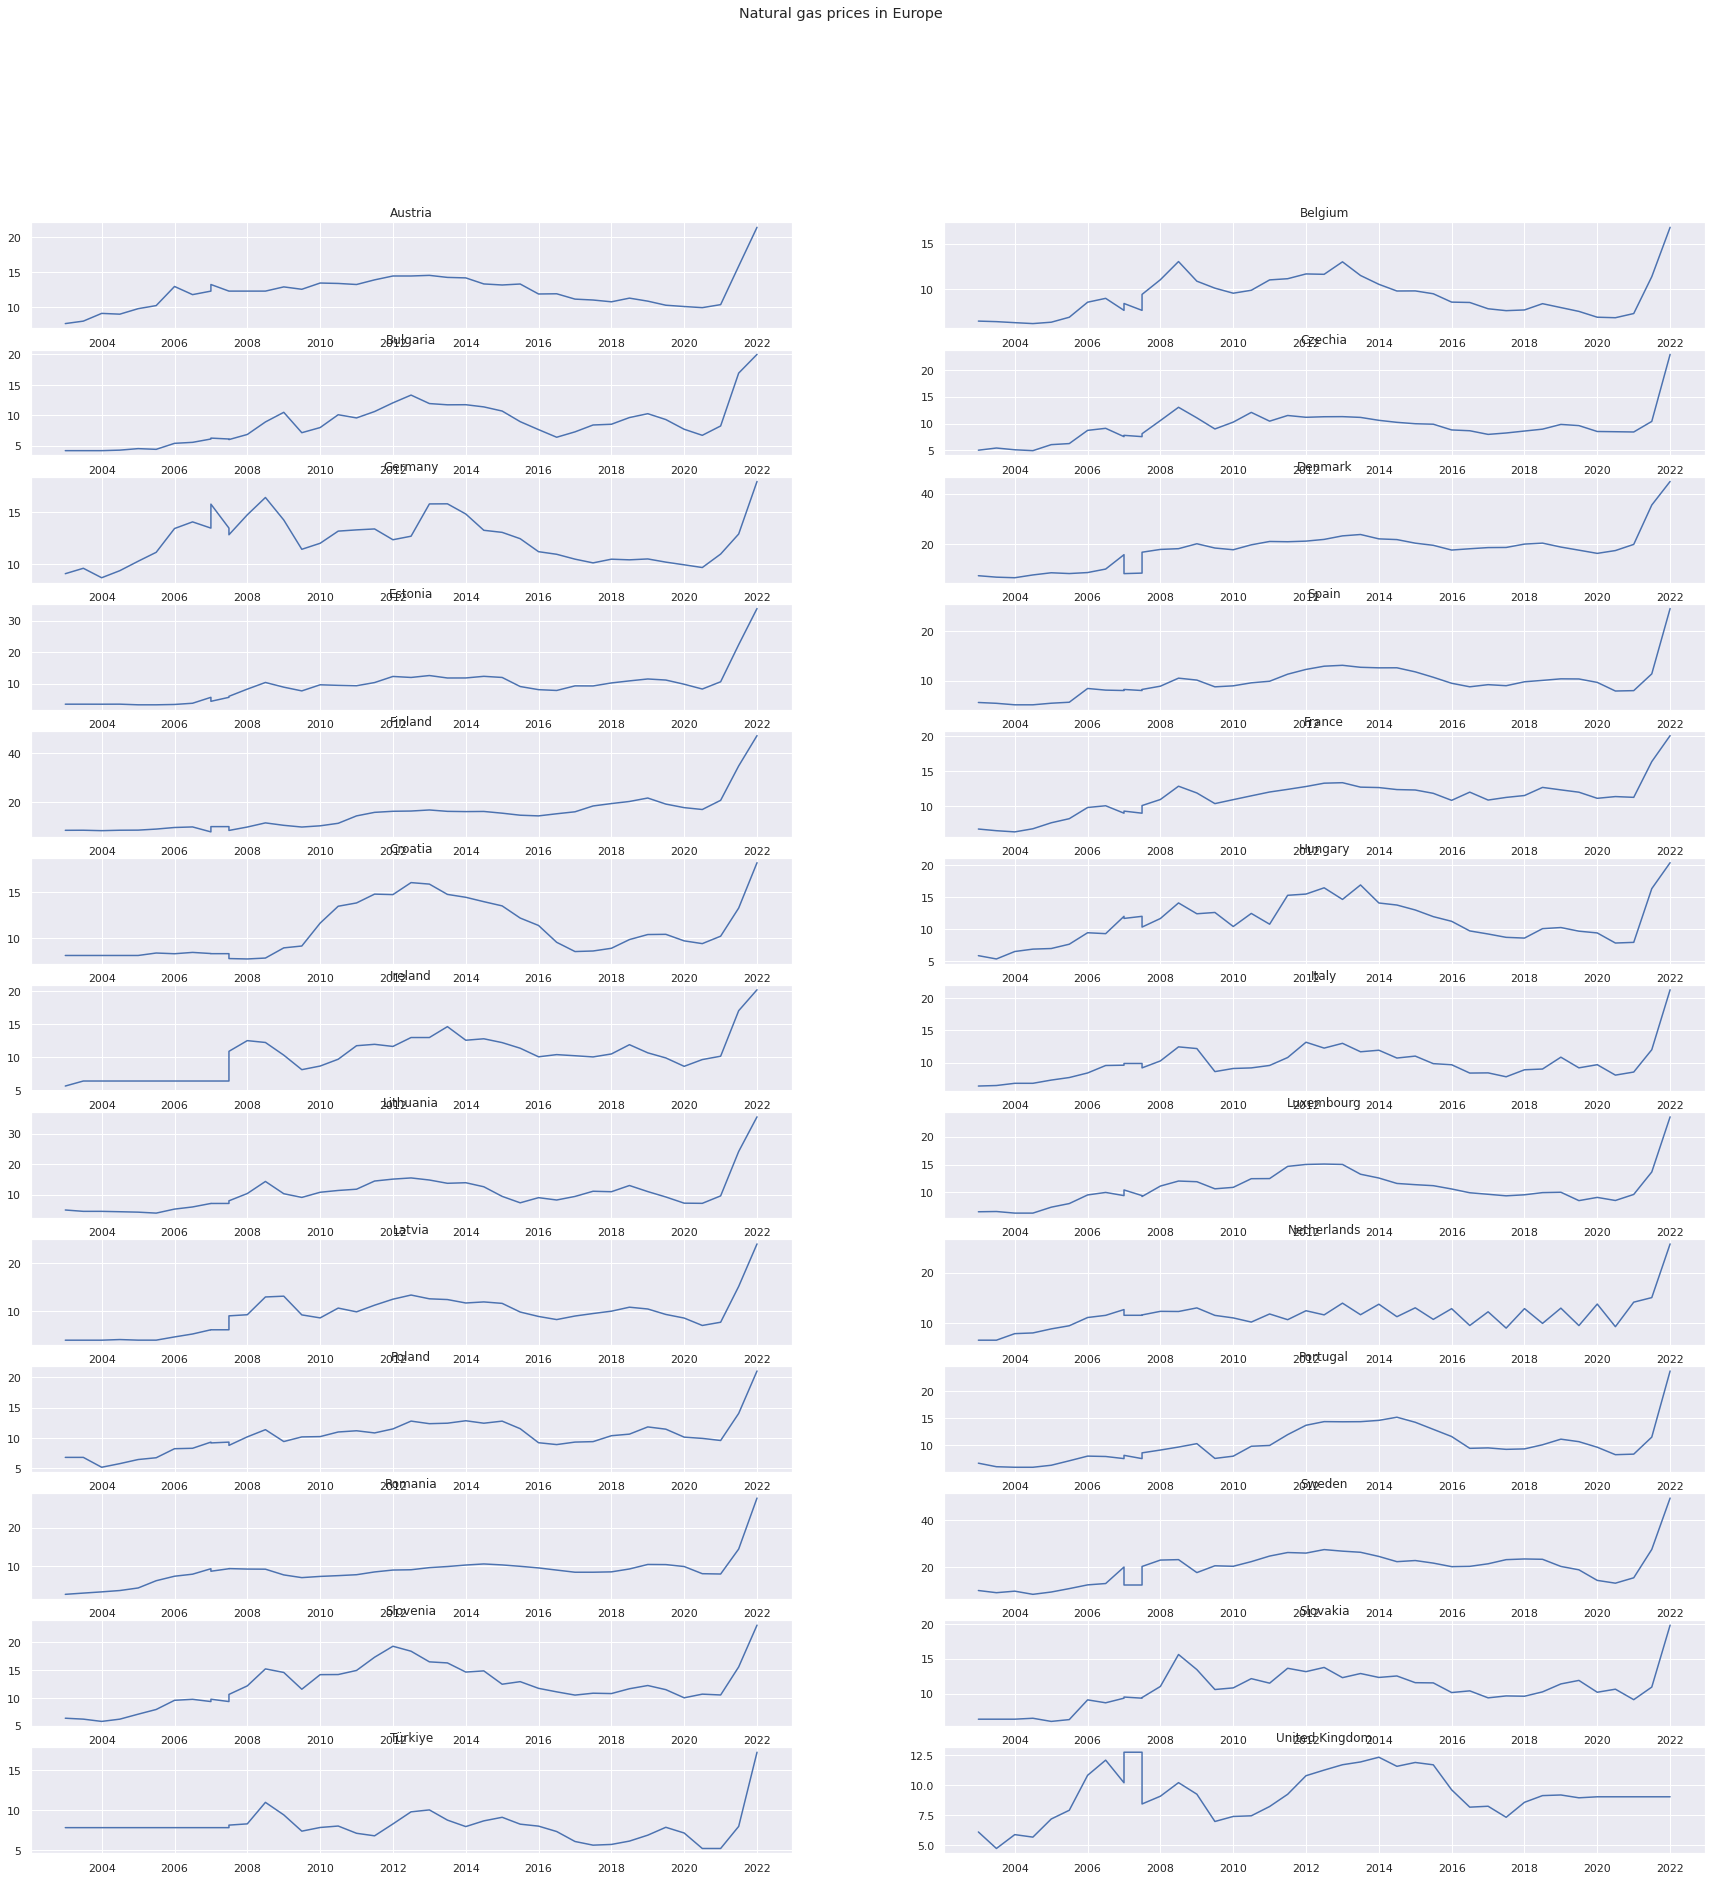

In [22]:
def plot_series(df):
  FIGSIZE = 30
  NUMBER_OF_ROWS, NUMBER_OF_COLUMNS = optimal_subplot_dimensions(df.shape[1])

  fig, axs = plt.subplots(NUMBER_OF_ROWS,NUMBER_OF_COLUMNS,figsize=(FIGSIZE,FIGSIZE))
  fig.suptitle('Natural gas prices in Europe')
  for i in range(NUMBER_OF_ROWS):
      for j in range(NUMBER_OF_COLUMNS):
          if i*NUMBER_OF_COLUMNS+j+1>len(df):
              continue
          axs[i, j].plot(df.iloc[:, i*NUMBER_OF_COLUMNS+j])
          axs[i, j].set_title(df.columns[i*NUMBER_OF_COLUMNS+j])
  plt.show()
     
plot_series(final_df)

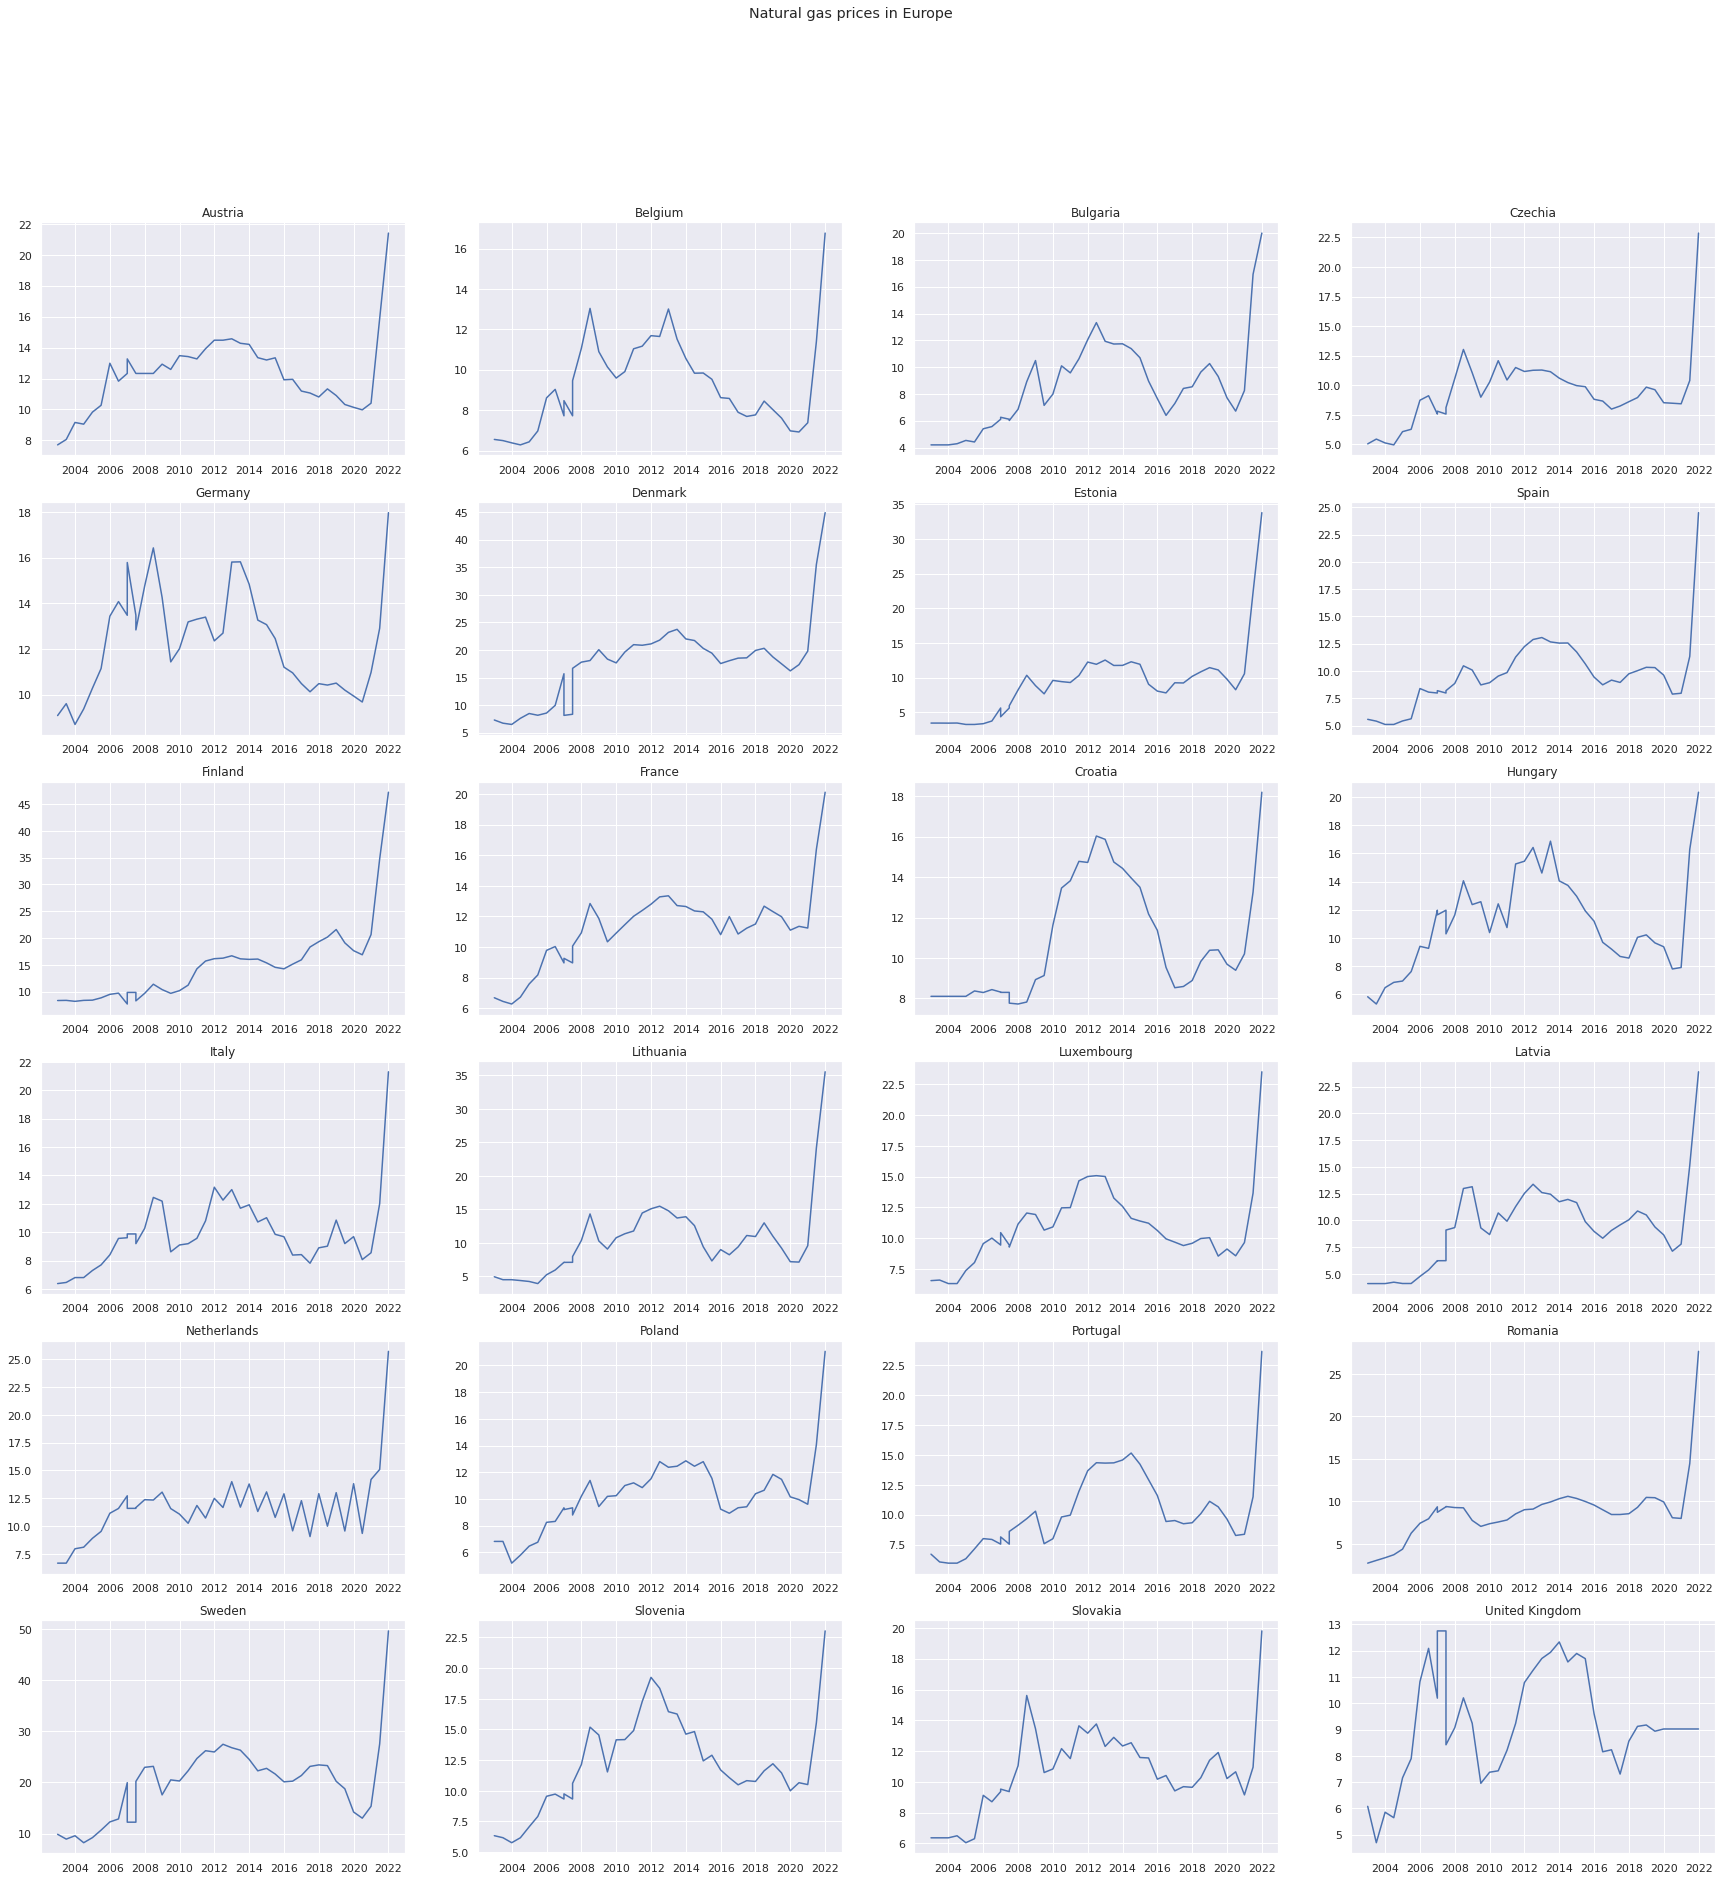

In [23]:
# Drop Turkey and Ireland since it has too many NA values:
final_df = final_df.drop(columns=['Türkiye', 'Ireland'])
scaled_df = scaled_df.drop(columns=['Türkiye', 'Ireland'])
plot_series(final_df)

## Save time series to files

In [24]:
final_df.to_csv("df.csv", index=True)
scaled_df.to_csv("scaled_df.csv", index=True)

# **Clustering**

In [25]:
!pip install minisom
!pip install tslearn

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import math

from tslearn.clustering import TimeSeriesKMeans
from matplotlib.pyplot import figure
from tslearn.clustering import silhouette_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# df = scaled_df.iloc[:-1]
df = scaled_df

### Helping functions

In [27]:
def find_column(df, values) -> str:
    for col in df.columns:
        if all(val in df[col].values for val in values):
            return col
    return None


def plot_clusters(df, labels):
  series = [df[column].values for column in df.columns]
  n_clusters = len(set(labels))
  rows, cols = optimal_subplot_dimensions(n_clusters)
  df_cluster_series =  pd.DataFrame(list(zip(series, labels)), columns=['series', 'cluster'])
  cluster_country_dict = df_cluster_series.groupby(['cluster'])['series'].apply(lambda x: [x for x in x]).to_dict()

  fig, axs = plt.subplots(rows, cols, figsize=(25, 15))
  fig.suptitle(f'Clusters')

  for i in range(rows):
    for j in range(cols):
        if i*cols+j+1>n_clusters: # pass the others that we can't fill
            continue
        cluster = list(cluster_country_dict.keys())[i*cols+j]
        if (cols == 1):
          for values in cluster_country_dict[cluster]:
            column = find_column(df, values)
            axs[i].plot(df[column], label=column)
          axs[i].legend()
        else:           
          for values in cluster_country_dict[cluster]:
            column = find_column(df, values)
            axs[i, j].plot(df[column],label=column)
          axs[i, j].legend()

  plt.show()

## Raw time series

### 𝑘-means


In [28]:
from tslearn.clustering import TimeSeriesKMeans

In [29]:
# Range of possible number of clusters
n_clusters = range(2, 5)
distance_measure = ['dtw', 'softdtw']

def kmeans(df):
  series = [df[column].tolist() for column in df.columns]
  cluster_metrics_k_means = pd.DataFrame(columns=distance_measure, index=n_clusters)

  labels_dict = {}
  for k in n_clusters:
    for measure in distance_measure:
      model = TimeSeriesKMeans(
        n_clusters=k,
        metric=measure,
        random_state=27346,
      )

      labels = model.fit_predict(series)
      score = silhouette_score(series, labels, metric=measure)
      cluster_metrics_k_means.at[k, measure] = score
      labels_dict[score] = labels

      print("\n")
      print("\n")
      print(measure)
      plot_clusters(df, labels)

  #plot_clusters(df, labels_dict[max(labels_dict)])
  return cluster_metrics_k_means





dtw


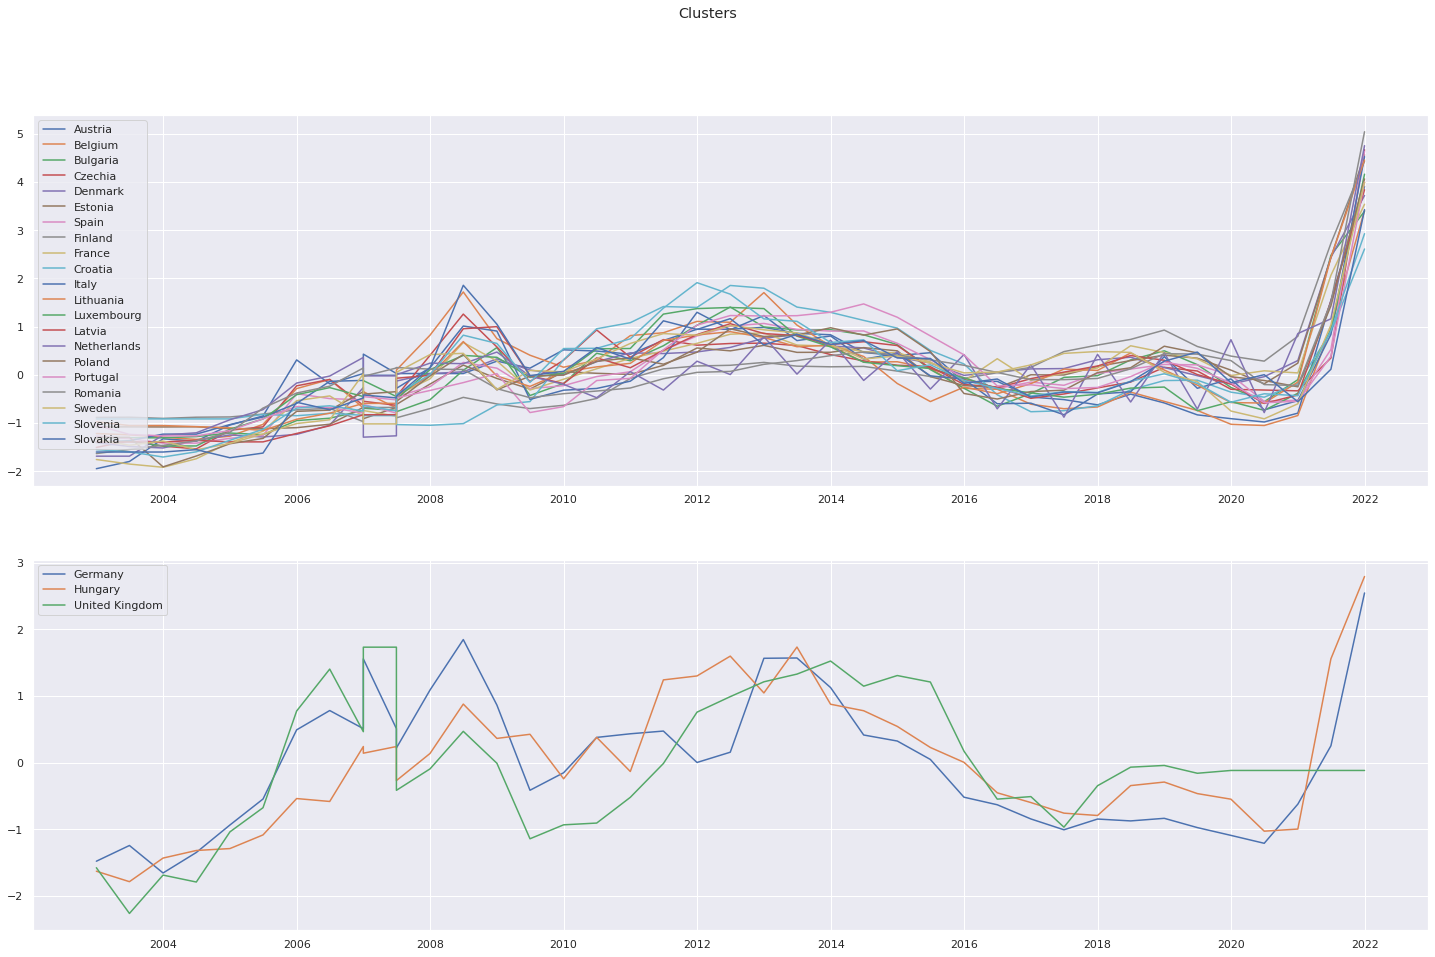





softdtw


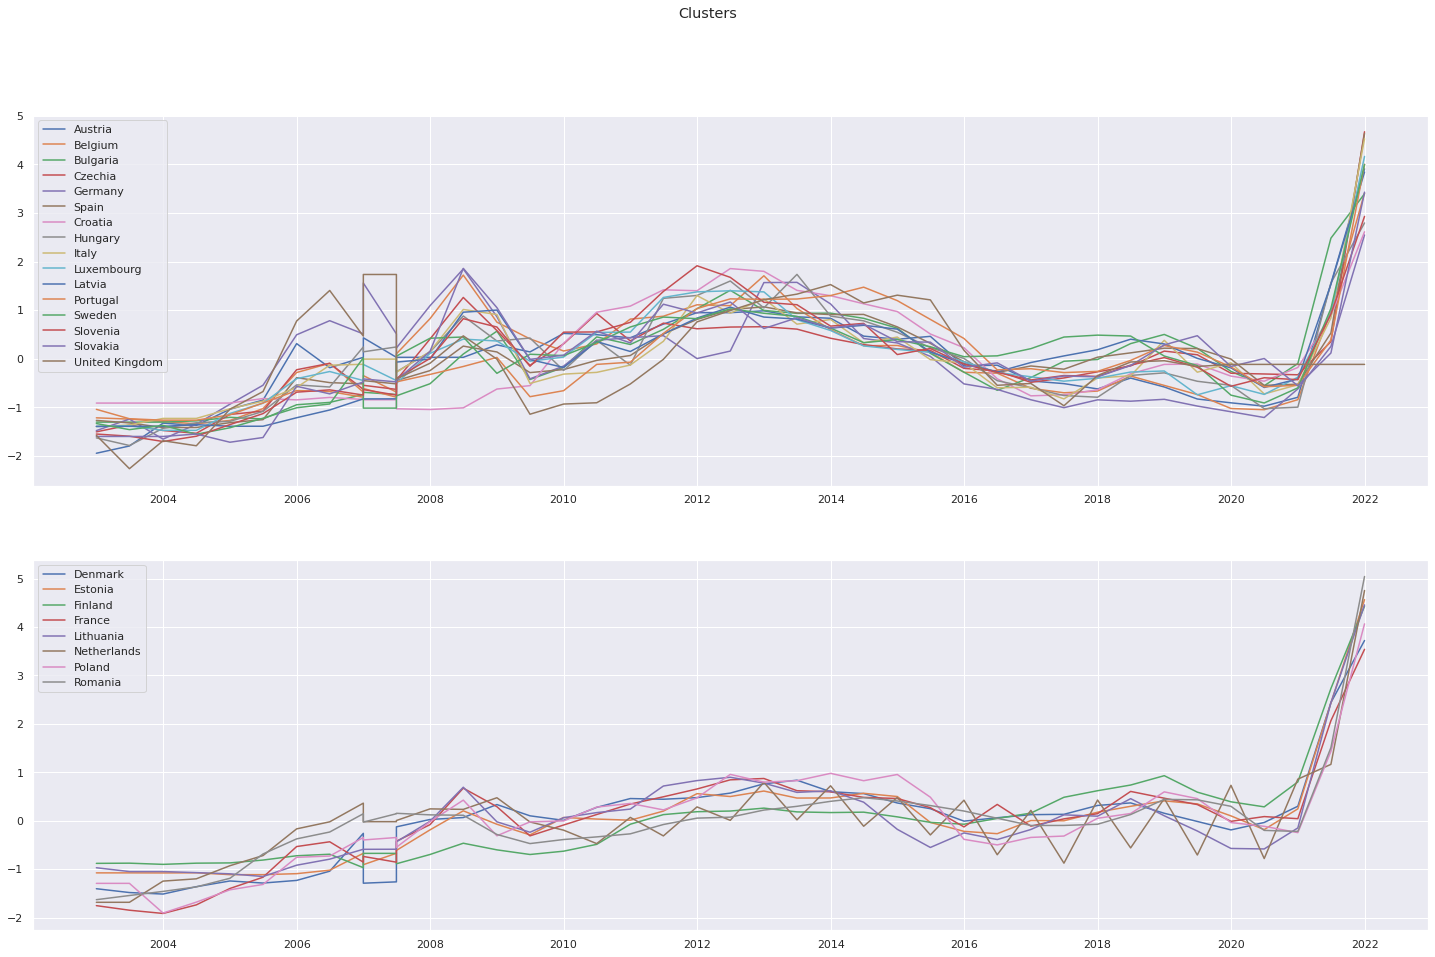





dtw


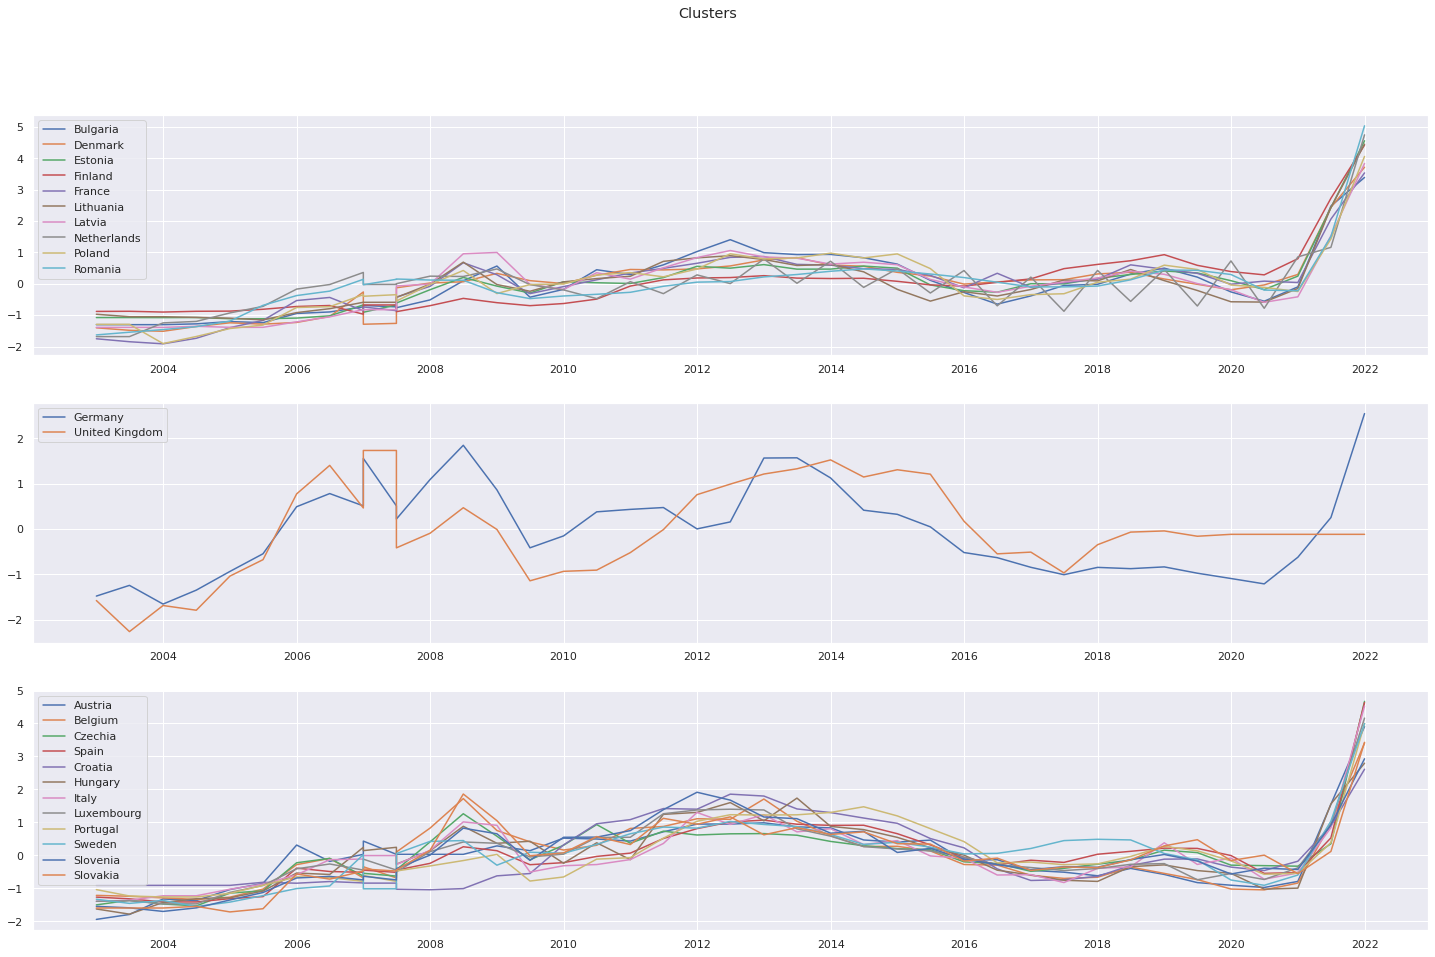





softdtw


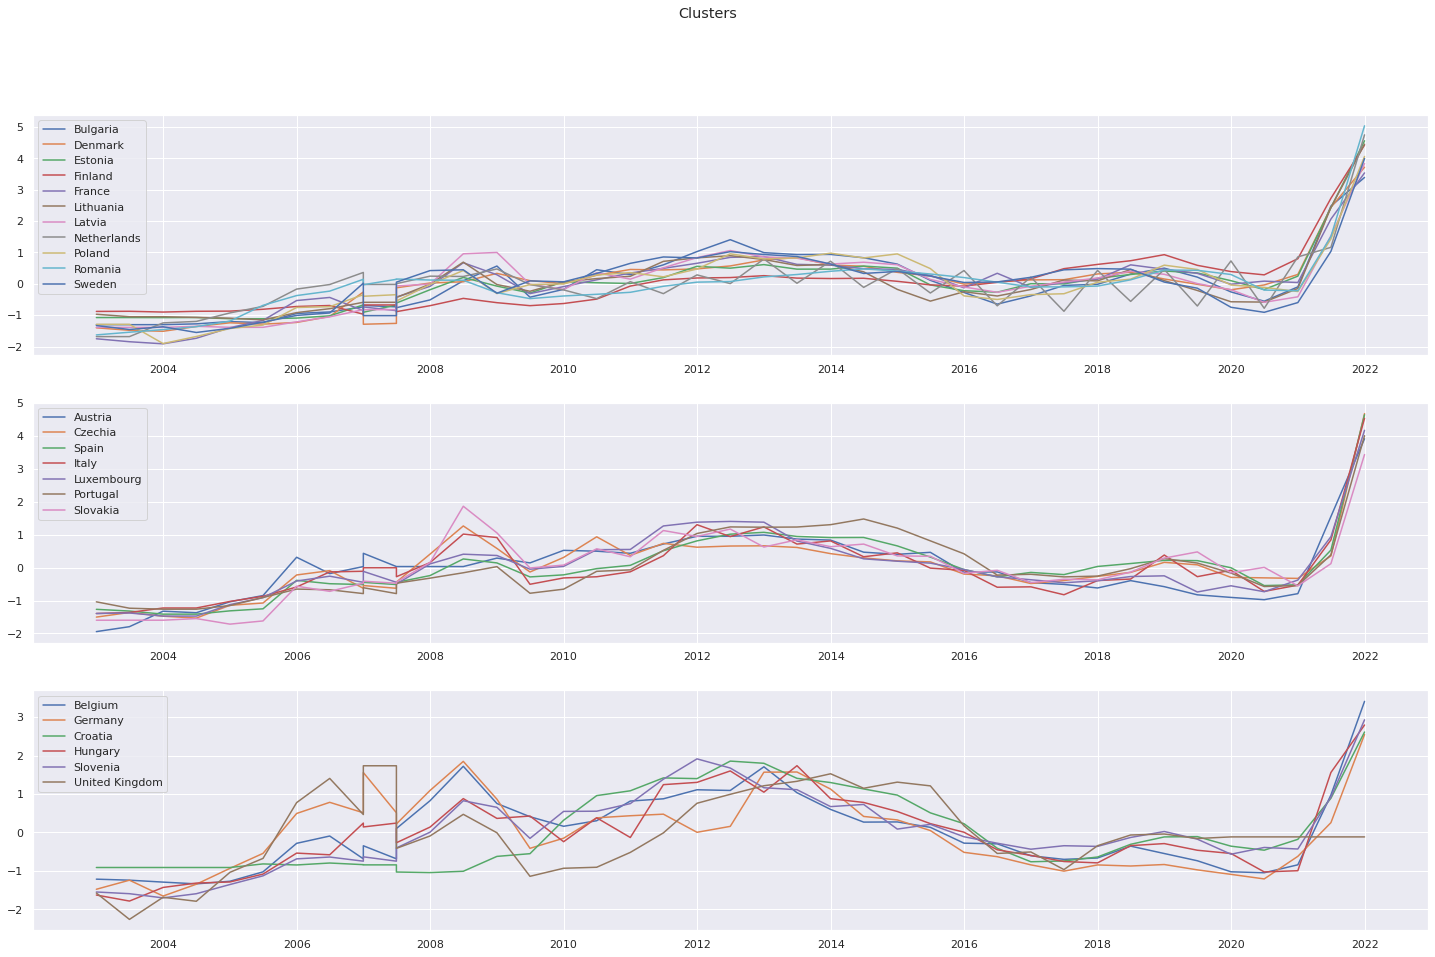





dtw


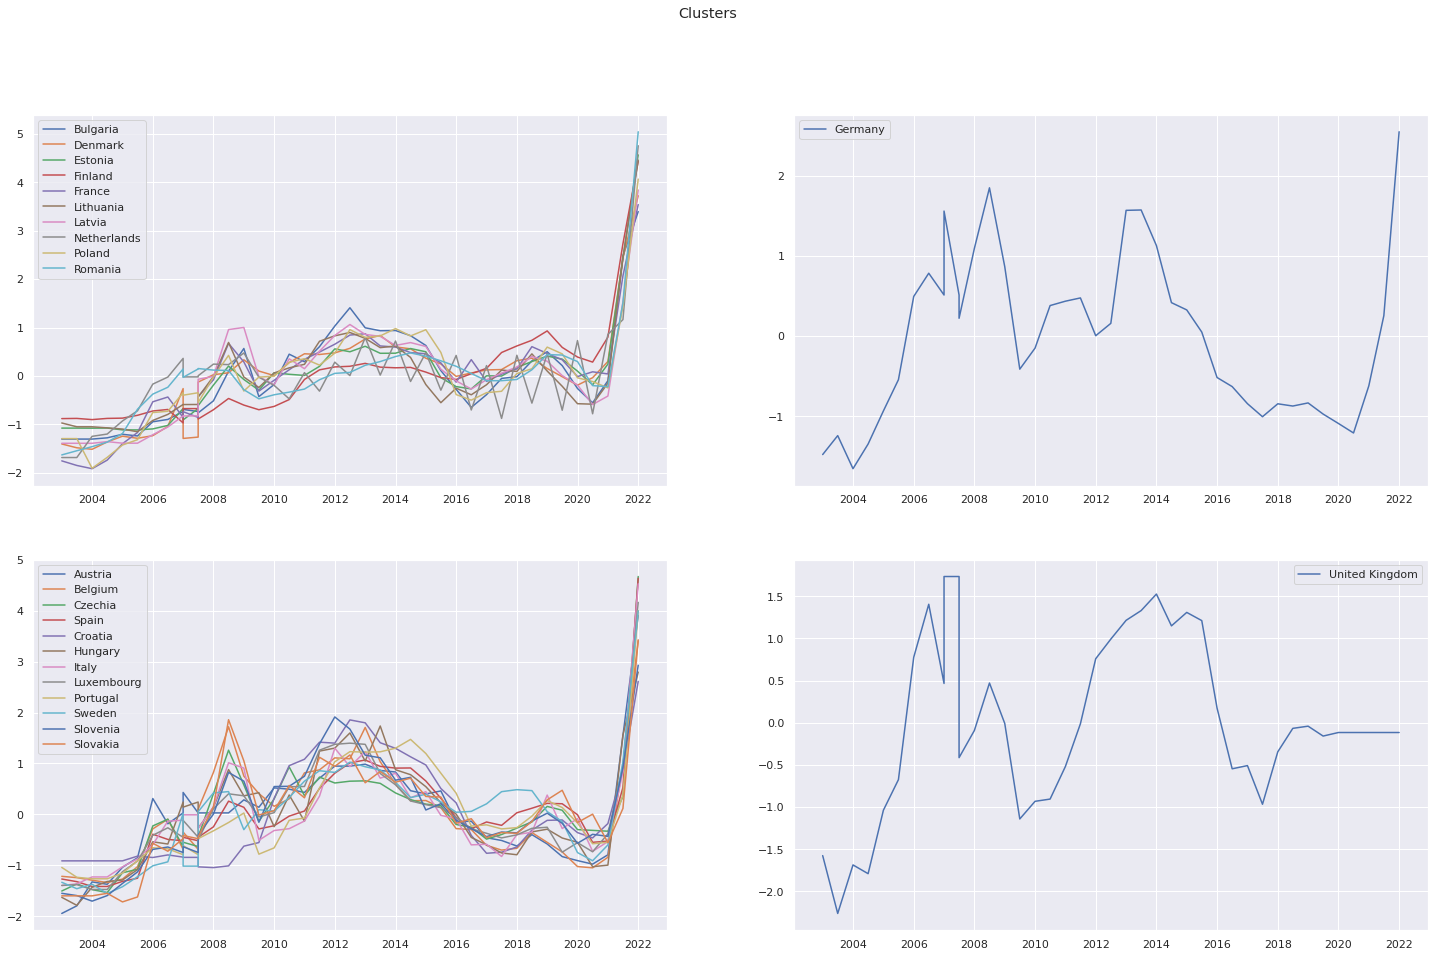





softdtw


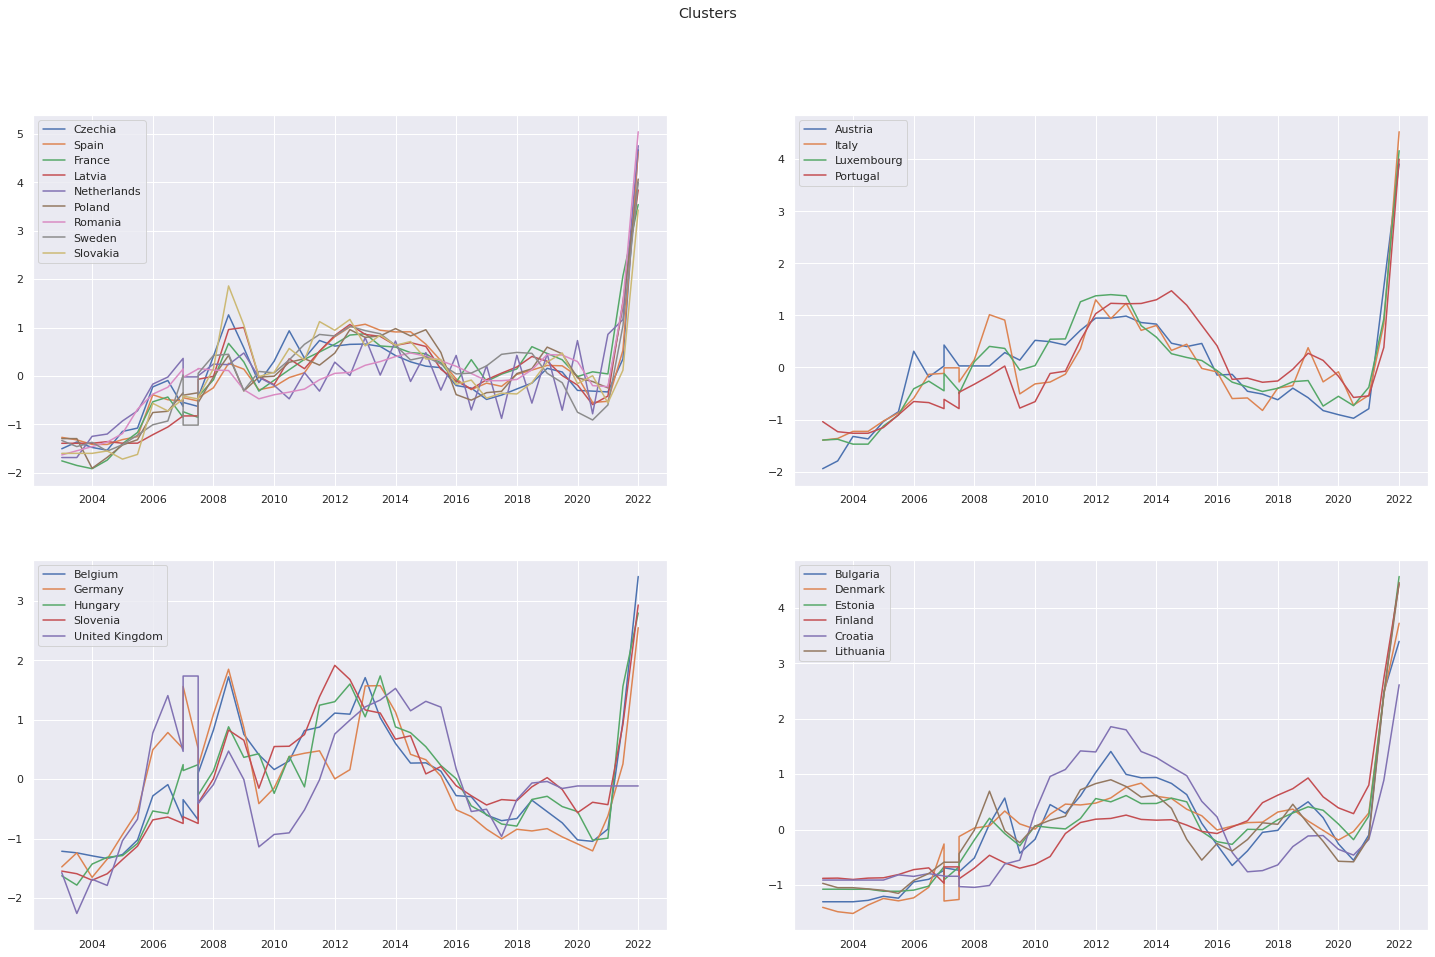

dtw   softdtw
2  0.337335  0.236128
3  0.166665  0.153837
4  0.143076  0.050352

In [30]:
kmeans(df)

### k-shape

In [31]:
from tslearn.clustering import KShape

n_clusters = range(2, 5)
distance_measure = ['dtw', 'softdtw']

def kshape(df):
  series = [df[column].tolist() for column in df.columns]
  cluster_metrics_k_means = pd.DataFrame(columns=distance_measure, index=n_clusters)

  labels_dict = {}
  for k in n_clusters:
    for measure in distance_measure:
      model = KShape(
        n_clusters=k,
        random_state=27346,
      )

      labels = model.fit_predict(series)
      score = silhouette_score(series, labels, metric=measure)
      cluster_metrics_k_means.at[k, measure] = score
      labels_dict[score] = labels

      print("\n")
      print("\n")
      print(measure)
      plot_clusters(df, labels)

  # plot_clusters(df, labels_dict[max(labels_dict)])
  return cluster_metrics_k_means





dtw


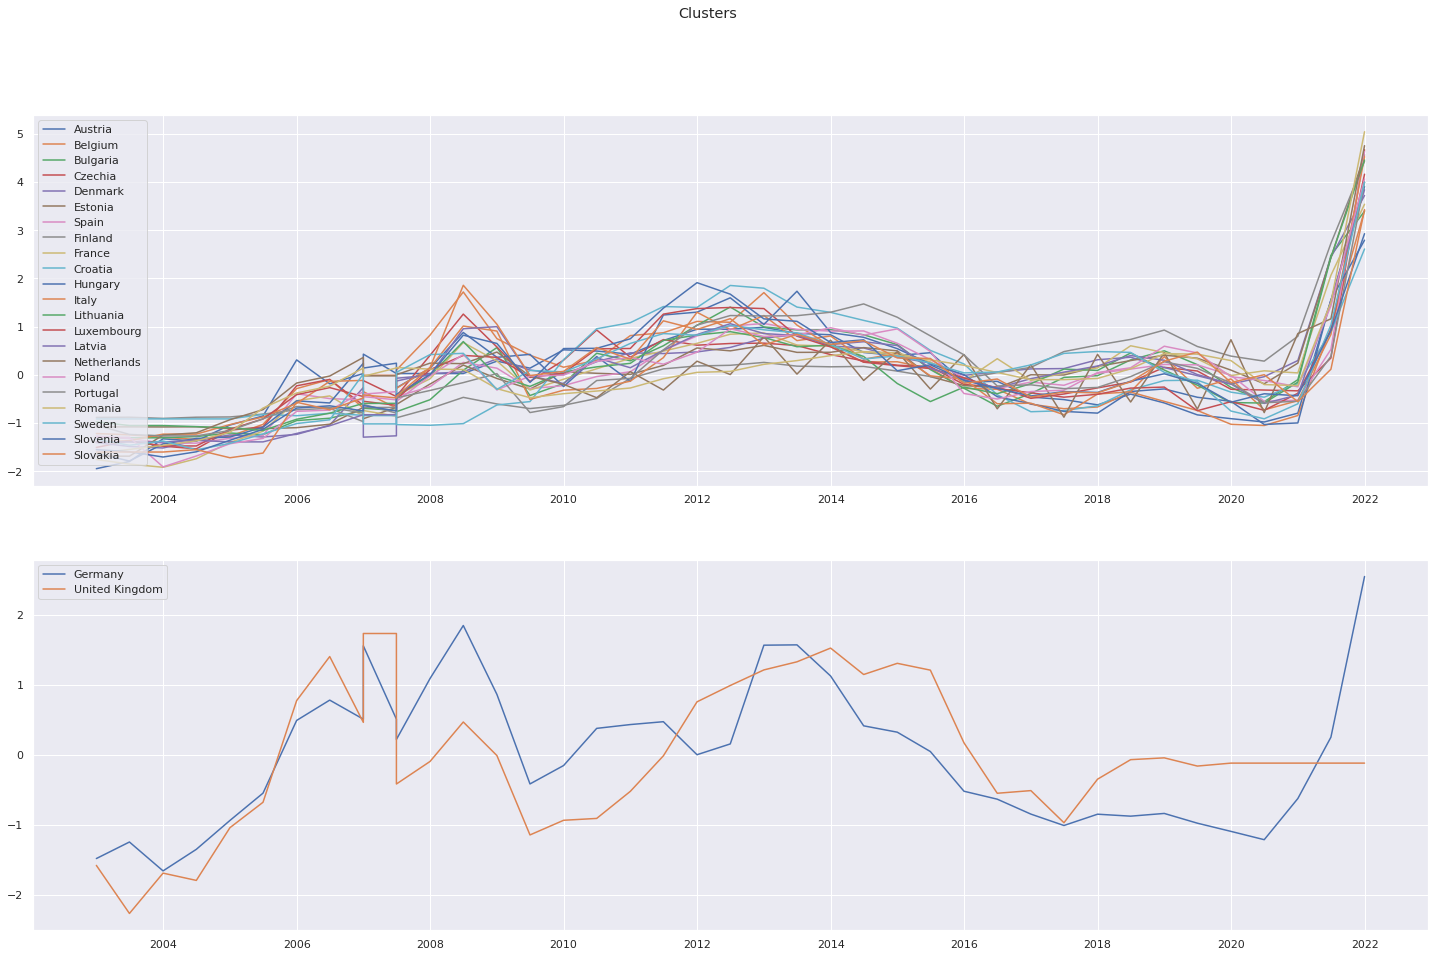





softdtw


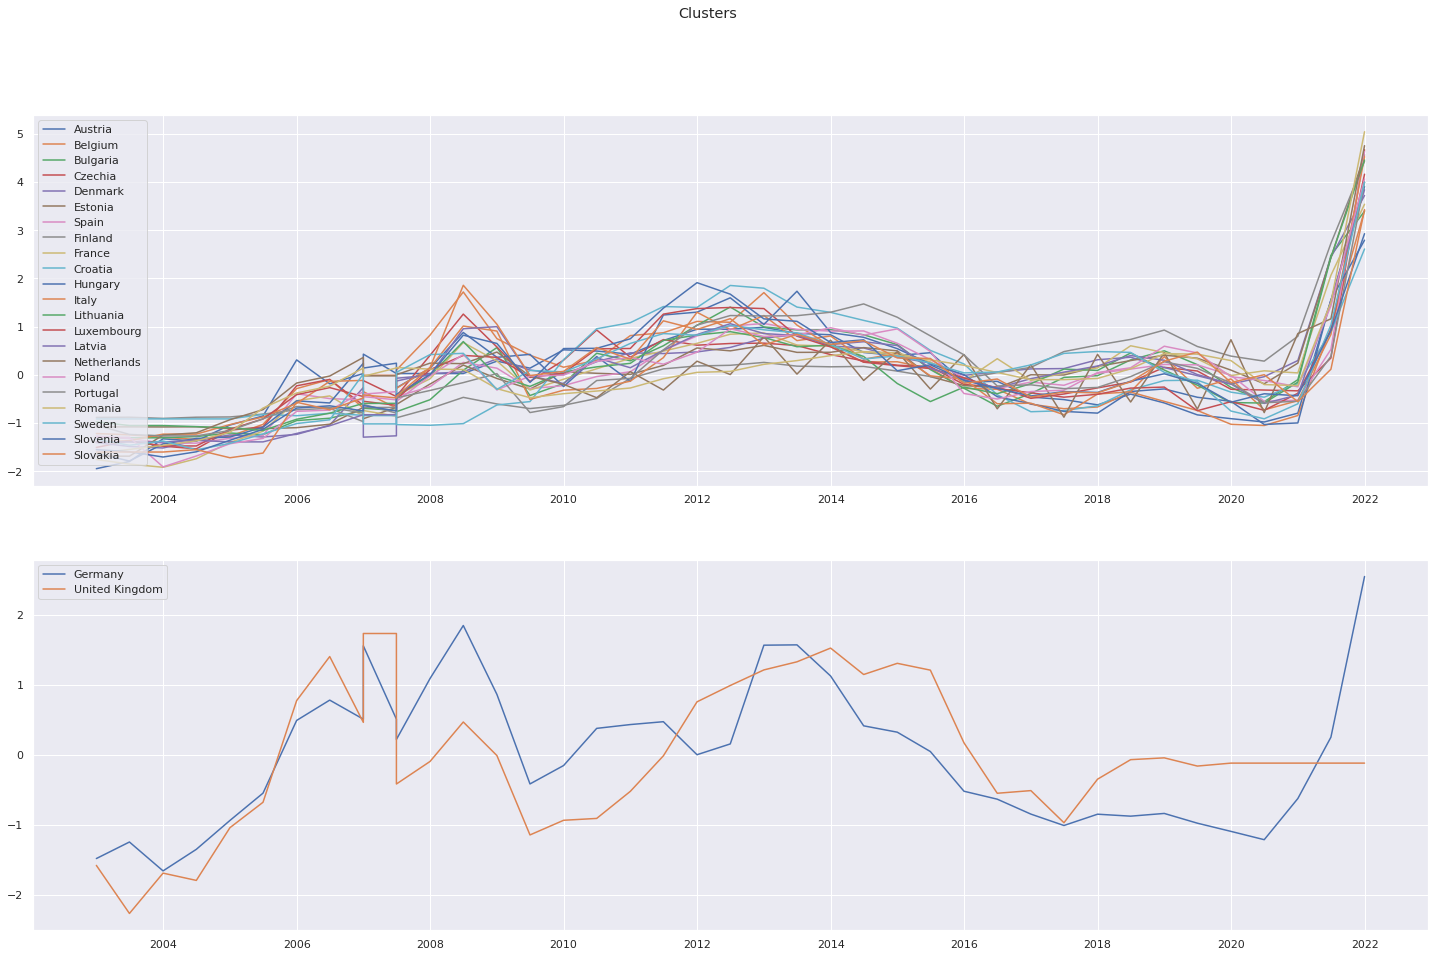





dtw


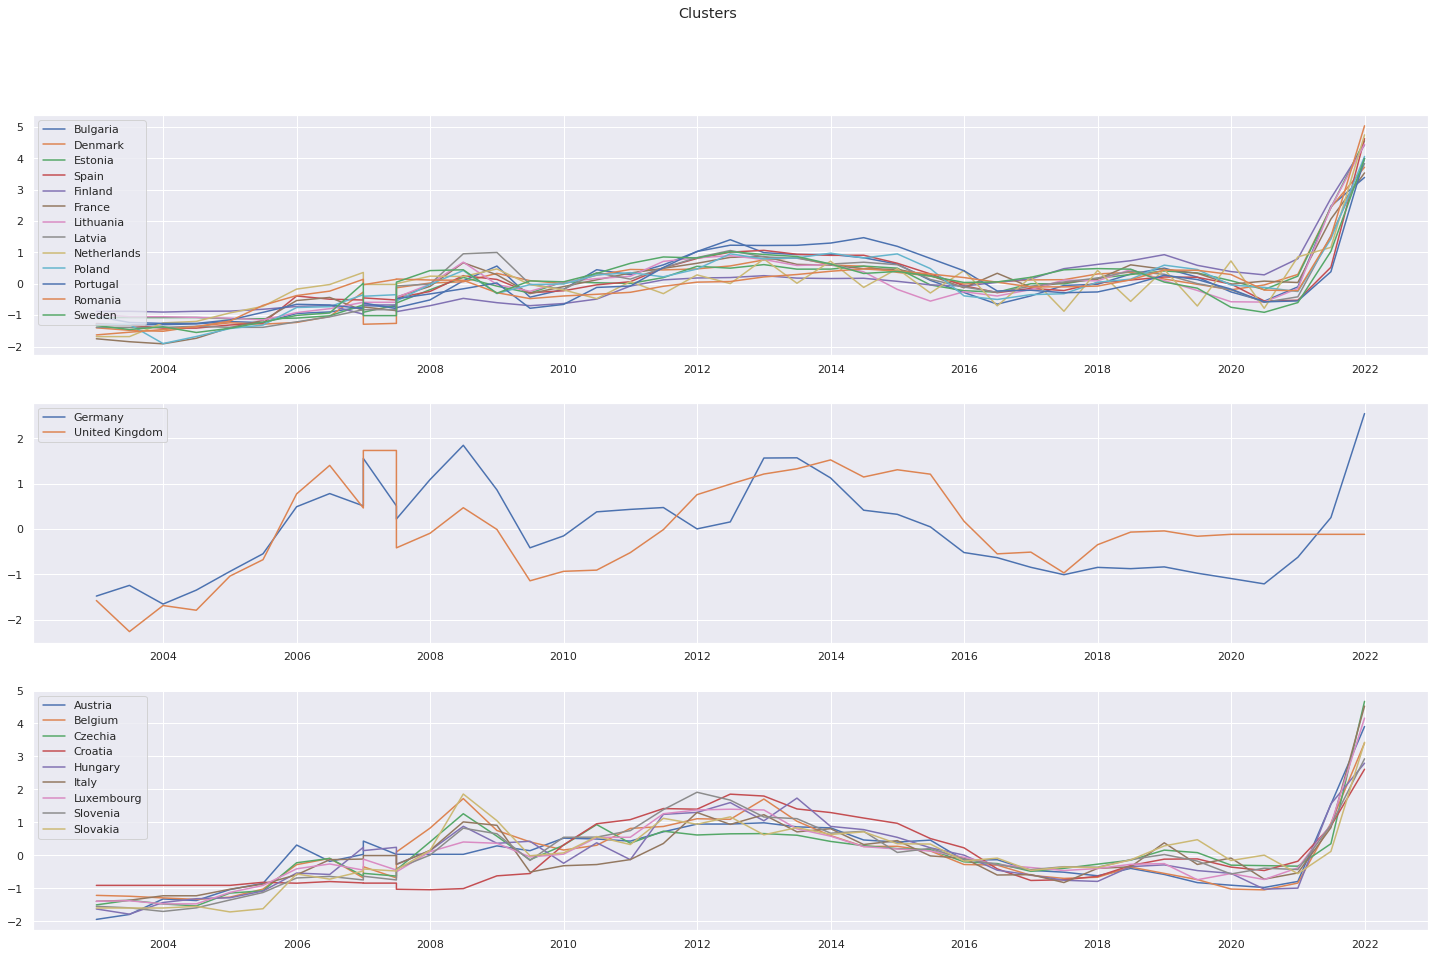





softdtw


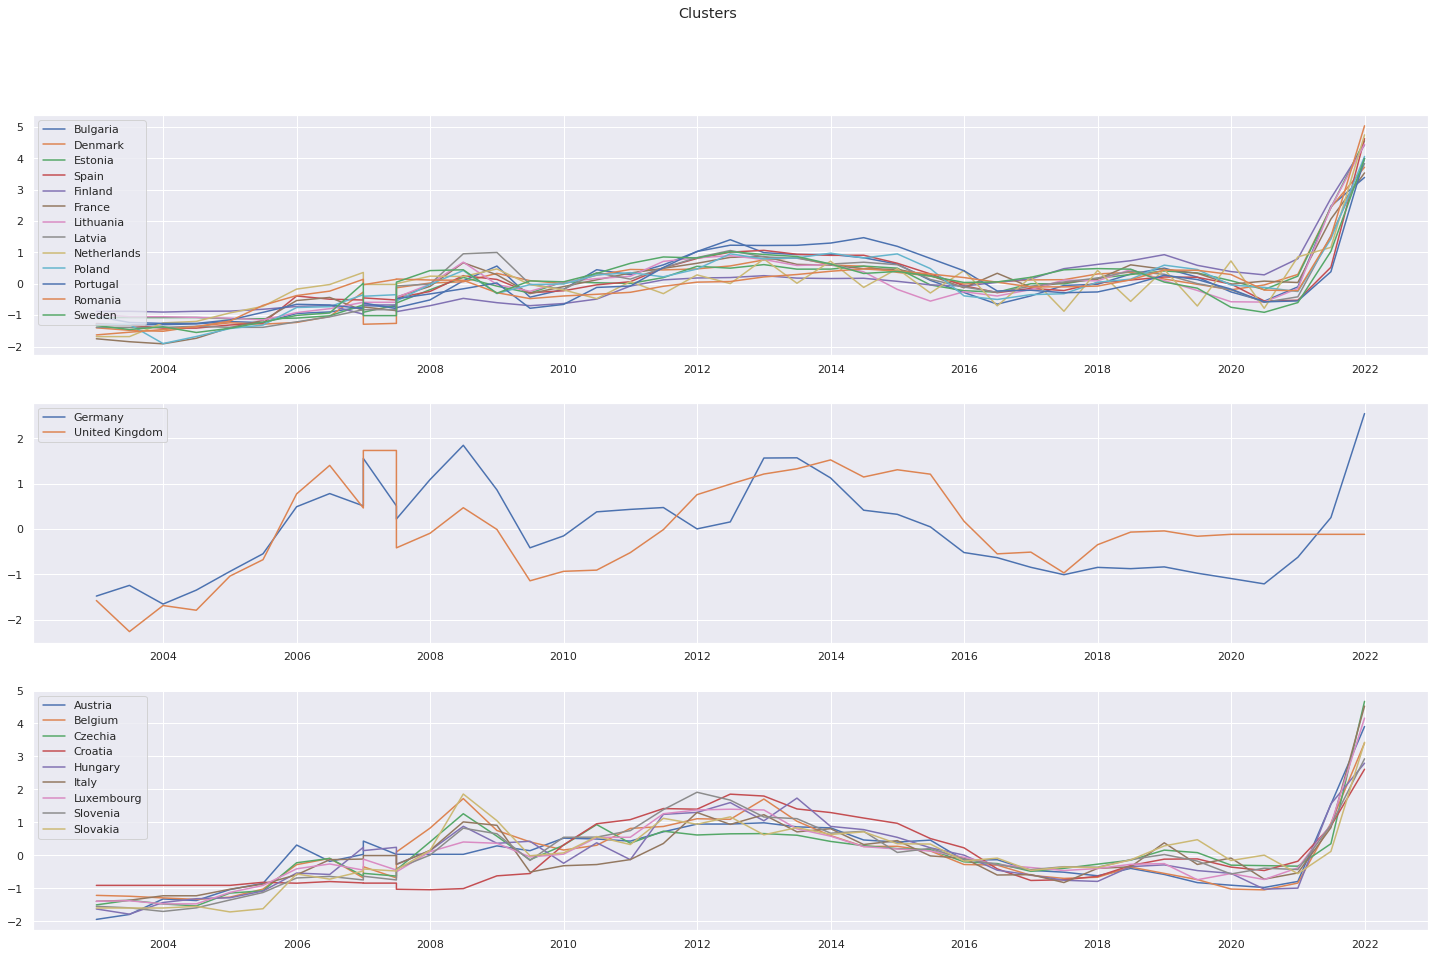





dtw


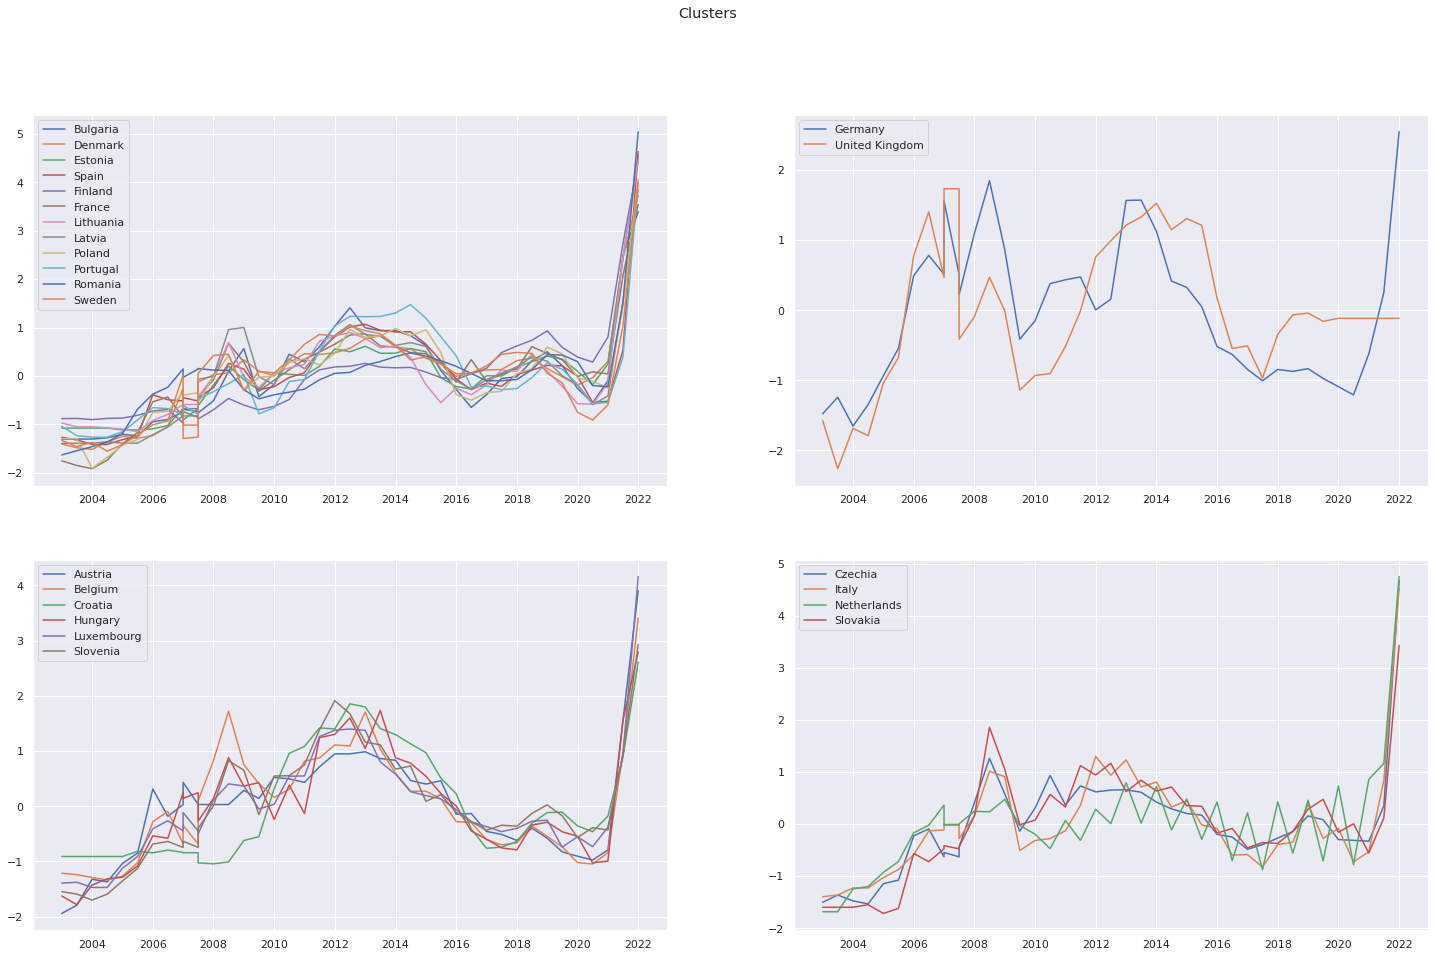





softdtw


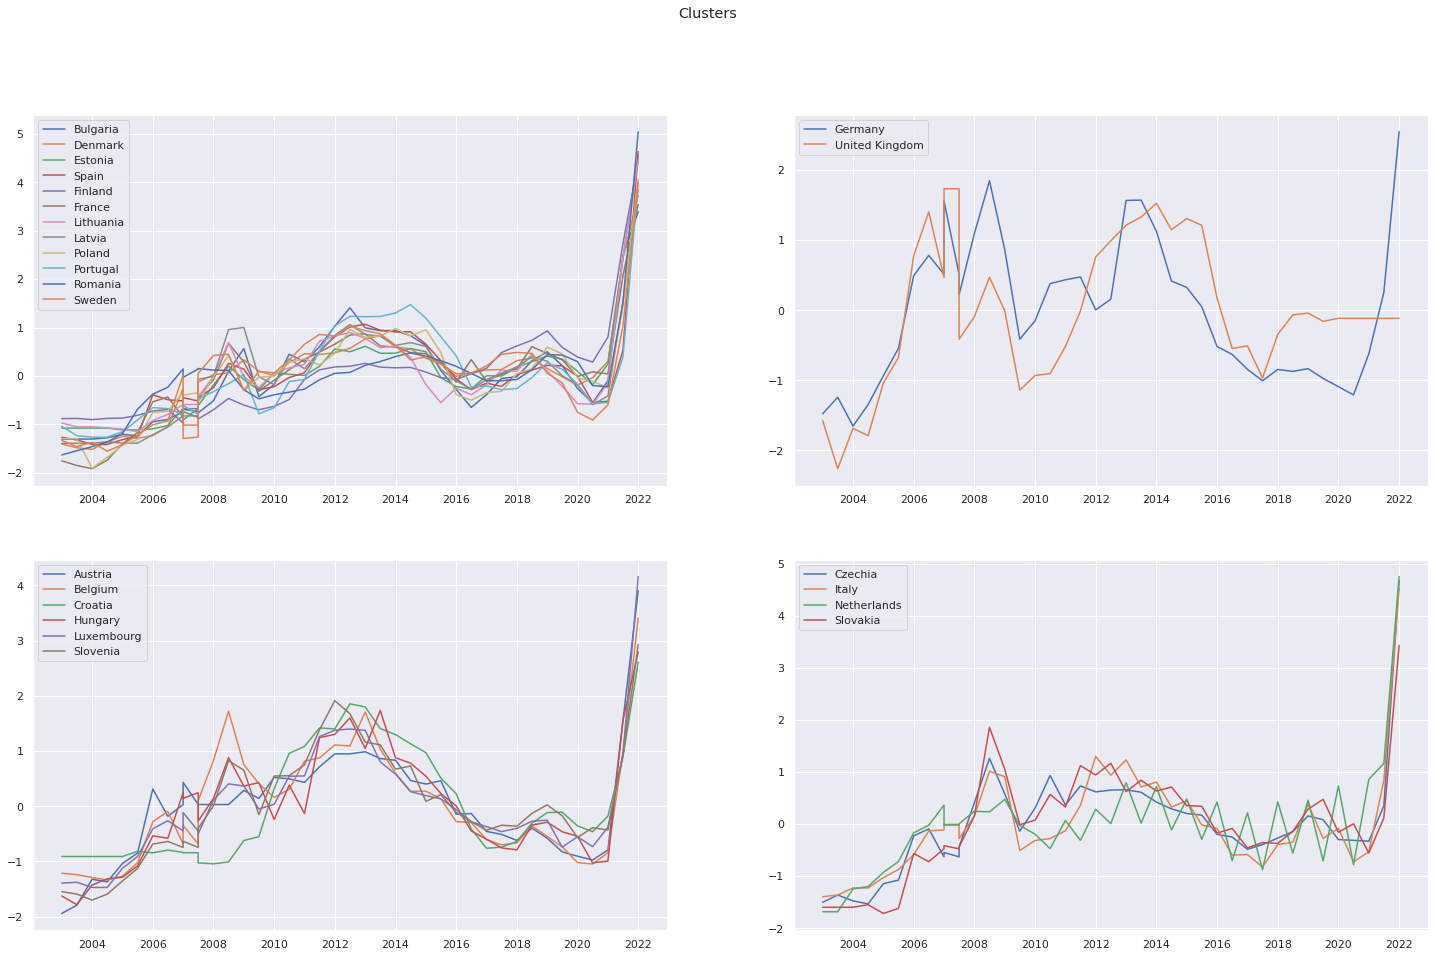

dtw   softdtw
2  0.423113  0.613767
3  0.129964  0.278686
4  0.119291  0.177794

In [32]:
kshape(df)

## Hierarchical clustering for time series

In [33]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from copy import deepcopy
from sktime.distances import ddtw_distance
from tslearn.metrics import soft_dtw
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram


clustering_methods = ['complete', 'single', 'average', 'ward']
n_clusters = range(2, 9)
distance_measure = ['dtw', 'softdtw']

# Build distance matrix with dtw     
def create_distance_matrix(df, measure):
  series = [df[column].tolist() for column in df.columns]
  s = [x for x in series]
  for i in range(len(series)):
      length = len(series[i])
      series[i] = np.array(series[i]).reshape((length, 1))

  # Initialize distance matrix
  n_series = len(series)
  distance_matrix = np.zeros(shape=(n_series, n_series))

  # Build distance matrix
  for i in range(n_series):
      for j in range(n_series):
          x = series[i]
          y = series[j]
          if i != j:
            if measure == "softdtw":
              dist = soft_dtw(x, y)
            else:
              dist = ddtw_distance(x, y)
            distance_matrix[i, j] = dist
  return distance_matrix


# Build a linkage matrix
def hierarchical_clustering(distance_matrix, measure, method='ward',):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z, labels = df.columns.tolist())
    plt.title(f"Dendrogram for {method}-linkage with distance measure: {measure}")
    plt.show()
    
    return Z

def build_clusters(linkage_matrix, k):
  cluster_labels = fcluster(linkage_matrix, k, criterion='maxclust')
  return cluster_labels


def get_hierarchical_clustering_metrics(df):
  series = [df[column].tolist() for column in df.columns]

  for measure in distance_measure:
    cluster_metrics_hierarch = pd.DataFrame(columns=clustering_methods, index=n_clusters)
    distance_matrix = create_distance_matrix(df, measure)

    for method in clustering_methods:
      linkage_matrix = hierarchical_clustering(distance_matrix, measure, method)

      for k in n_clusters:
        labels = build_clusters(linkage_matrix, k).tolist()
        score = silhouette_score(series, labels, metric=measure)
        cluster_metrics_hierarch.at[k, method] = score
    
    print(f"\nMetrics for distance measure {measure}")
    print("\n")
    print(cluster_metrics_hierarch.to_markdown()) 
    print("\n")

/usr/local/lib/python3.8/dist-packages/scipy/cluster/hierarchy.py:364: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


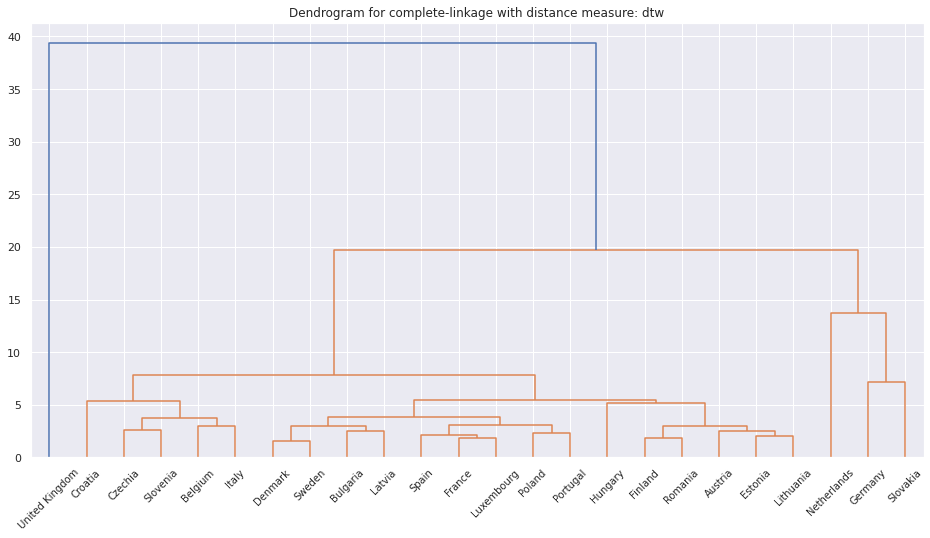

/usr/local/lib/python3.8/dist-packages/scipy/cluster/hierarchy.py:282: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


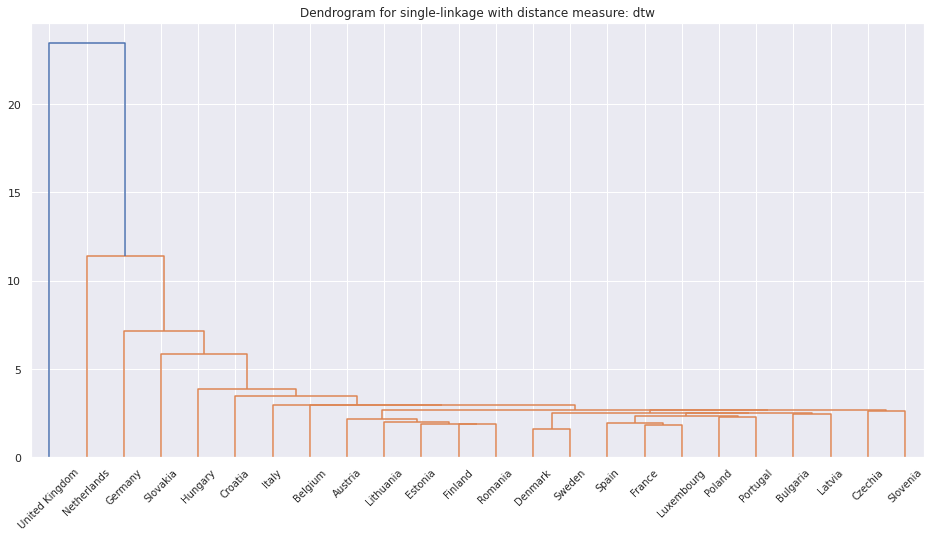

/usr/local/lib/python3.8/dist-packages/scipy/cluster/hierarchy.py:446: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


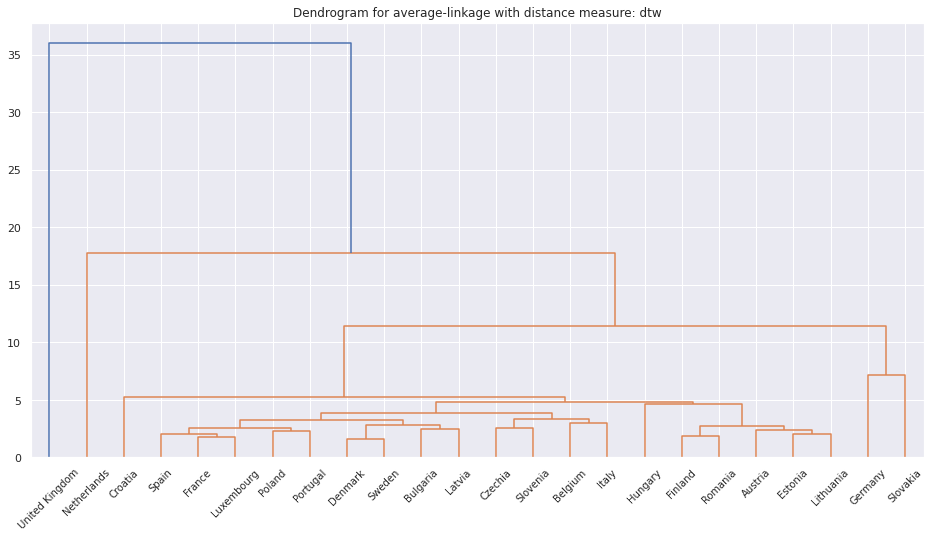

/usr/local/lib/python3.8/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


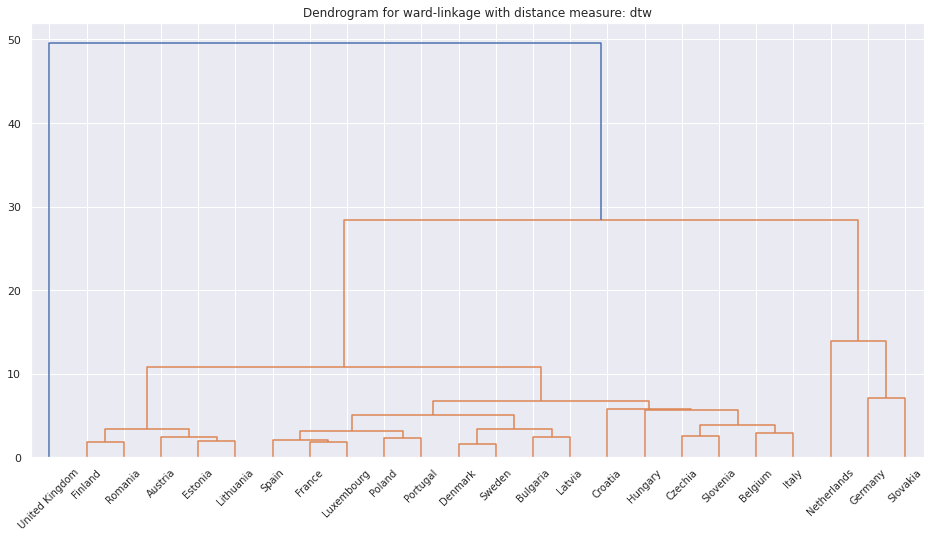


Metrics for distance measure dtw


|    |   complete |      single |   average |      ward |
|---:|-----------:|------------:|----------:|----------:|
|  2 |  0.509923  |  0.509923   | 0.509923  | 0.509923  |
|  3 |  0.136936  |  0.119465   | 0.119465  | 0.136936  |
|  4 |  0.0806985 |  0.0846034  | 0.0806985 | 0.0806985 |
|  5 |  0.0485075 |  0.0164948  | 0.0164948 | 0.0633289 |
|  6 |  0.0196515 | -0.00759991 | 0.020364  | 0.0344535 |
|  7 | -0.0026165 |  0.0121394  | 0.0149653 | 0.0348057 |
|  8 | -0.0110254 | -0.0599173  | 0.0254633 | 0.0261716 |




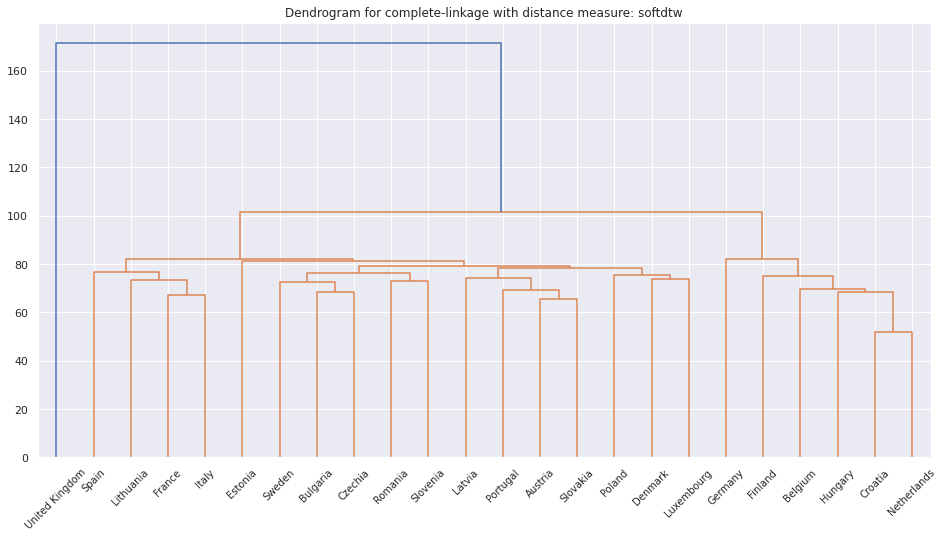

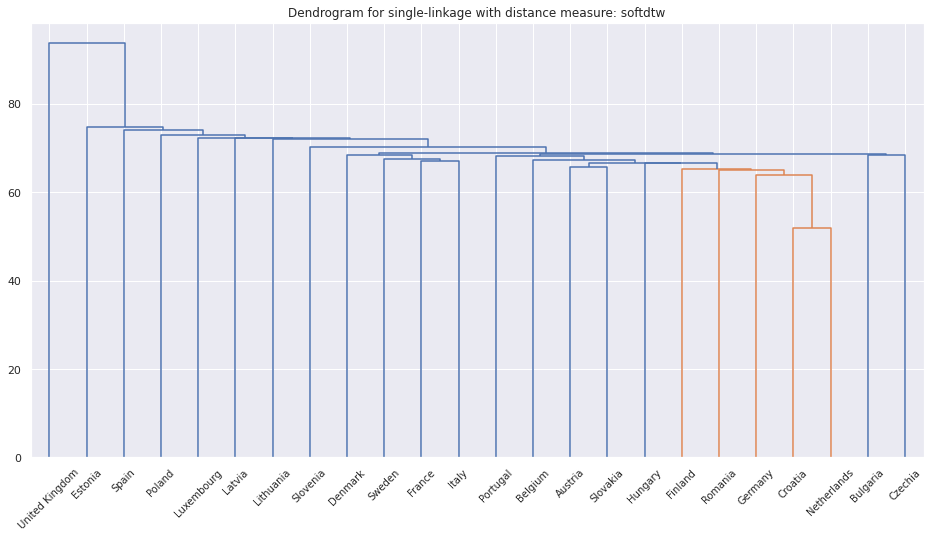

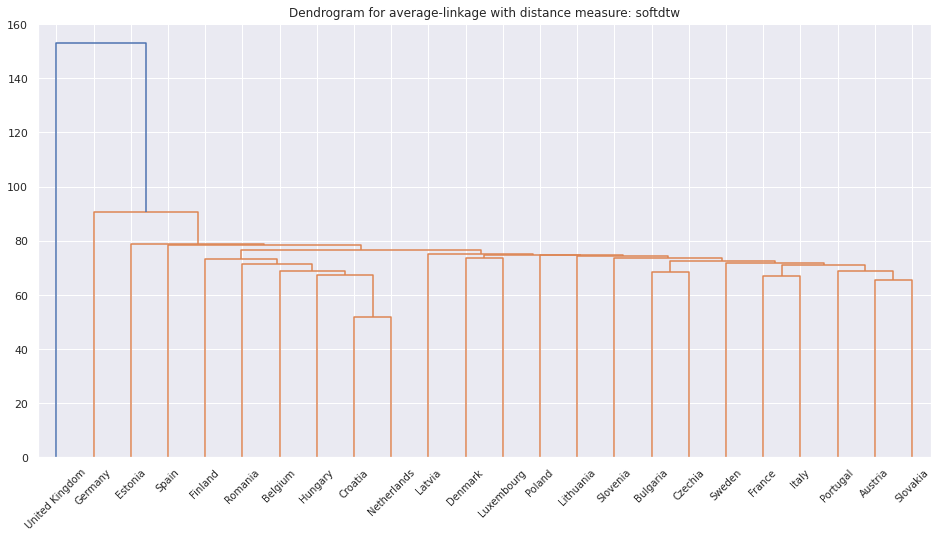

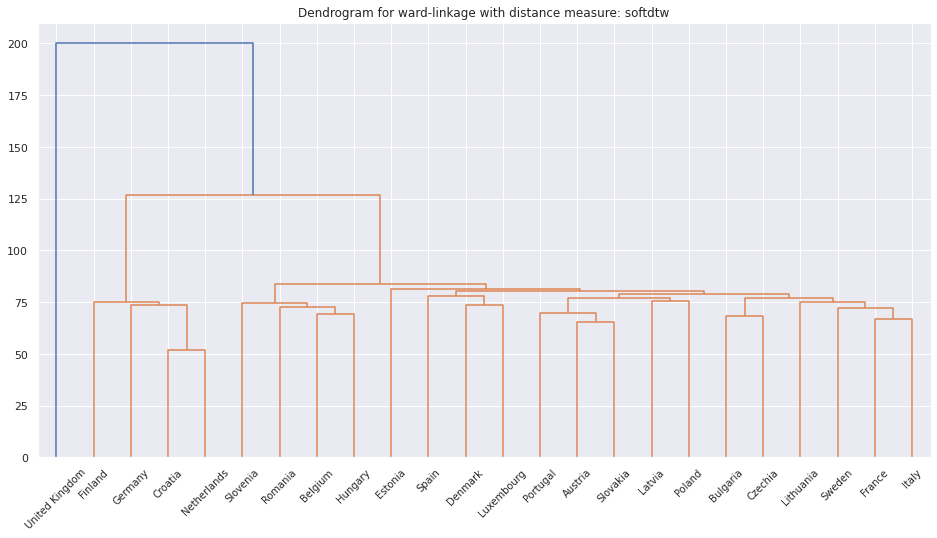


Metrics for distance measure softdtw


|    |   complete |    single |   average |       ward |
|---:|-----------:|----------:|----------:|-----------:|
|  2 |   0.671012 |  0.671012 |  0.671012 |  0.671012  |
|  3 |   0.282136 | -0.109962 |  0.430194 |  0.339769  |
|  4 |   0.235831 | -0.367434 | -0.140037 |  0.0773761 |
|  5 |  -0.179475 | -0.373572 | -0.370878 | -0.157964  |
|  6 |  -0.245435 | -0.458632 | -0.331483 | -0.274251  |
|  7 |  -0.292416 | -0.458358 | -0.396559 | -0.32634   |
|  8 |  -0.338193 | -0.432564 | -0.415817 | -0.405151  |




In [35]:
get_hierarchical_clustering_metrics(df)

## Feature-based clustering

### tsfresh

In [36]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [37]:
from tsfresh import extract_features

# Prepare df for tsfresh format
def transform_df(df):
  rows = []
  for col in df:
    country = col
    for idx, value in df[col].iteritems():
      rows.append((country, idx, value))
  new_df = pd.DataFrame(rows, columns=['id', 'time', 'value'])
  return new_df

tsfresf_df = transform_df(df)
tsfresf_df

ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


id       time     value
0           Austria 2003-01-01 -1.943492
1           Austria 2003-07-01 -1.793981
2           Austria 2004-01-01 -1.324092
3           Austria 2004-07-01 -1.371081
4           Austria 2005-01-01 -1.037886
..              ...        ...       ...
979  United Kingdom 2020-01-01 -0.115616
980  United Kingdom 2020-07-01 -0.115616
981  United Kingdom 2021-01-01 -0.115616
982  United Kingdom 2021-07-01 -0.115616
983  United Kingdom 2022-01-01 -0.115616

[984 rows x 3 columns]

In [39]:
from tsfresh.feature_extraction import extract_features, ComprehensiveFCParameters, EfficientFCParameters
from tsfresh.feature_extraction.settings import MinimalFCParameters

# extract features
extracted_features = extract_features(tsfresf_df, column_id="id", column_sort="time", default_fc_parameters=ComprehensiveFCParameters())
extracted_features = extracted_features.transpose()

# drop na
extracted_features = extracted_features.dropna()
extracted_features = extracted_features.drop_duplicates()

# scaling
extracted_features = pd.DataFrame(s_scaler.fit_transform(extracted_features), columns=extracted_features.columns, index=extracted_features.index)
extracted_features

Feature Extraction: 100%|██████████| 24/24 [00:06<00:00,  3.83it/s]


Austria  Belgium  Bulgaria  \
value__variance_larger_than_standard_deviation    -0.05    -0.05     -0.05   
value__has_duplicate_max                          -0.05    -0.05     -0.05   
value__has_duplicate_min                          -0.05    -0.05     -0.05   
value__has_duplicate                              -0.05    -0.05     -0.05   
value__sum_values                                 -0.05    -0.05     -0.05   
...                                                 ...      ...       ...   
value__permutation_entropy__dimension_4__tau_1    -0.05    -0.05     -0.05   
value__permutation_entropy__dimension_5__tau_1    -0.05    -0.05     -0.05   
value__permutation_entropy__dimension_6__tau_1    -0.05    -0.05     -0.05   
value__permutation_entropy__dimension_7__tau_1    -0.05    -0.05     -0.05   
value__mean_n_absolute_max__number_of_maxima_7    -0.05    -0.05     -0.05   

                                                Croatia  Czechia  Denmark  \
value__variance_larger_than_standard_deviation     0.05     0.05    -0.05   
value__has_duplicate_max                           0.05     0.05    -0.05   
value__has_duplicate_min                           0.05     0.05    -0.05   
value__has_duplicate                               0.05     0.05    -0.05   
value__sum_values                                  0.05     0.05    -0.05   
...                                                 ...      ...      ...   
value__permutation_entropy__dimension_4__tau_1     0.05     0.05    -0.05   
value__permutation_entropy__dimension_5__tau_1     0.05     0.05    -0.05   
value__permutation_entropy__dimension_6__tau_1     0.05     0.05    -0.05   
value__permutation_entropy__dimension_7__tau_1     0.05     0.05    -0.05   
value__mean_n_absolute_max__number_of_maxima_7     0.05     0.05    -0.05   

                                                Estonia  Finland  France  \
value__variance_larger_than_standard_deviation     0.05     0.05    0.05   
value__has_duplicate_max                           0.05     0.05    0.05   
value__has_duplicate_min                           0.05     0.05    0.05   
value__has_duplicate                               0.05     0.05    0.05   
value__sum_values                                  0.05     0.05    0.05   
...                                                 ...      ...     ...   
value__permutation_entropy__dimension_4__tau_1     0.05     0.05    0.05   
value__permutation_entropy__dimension_5__tau_1     0.05     0.05    0.05   
value__permutation_entropy__dimension_6__tau_1     0.05     0.05    0.05   
value__permutation_entropy__dimension_7__tau_1     0.05     0.05    0.05   
value__mean_n_absolute_max__number_of_maxima_7     0.05     0.05    0.05   

                                                Germany  ...  Luxembourg  \
value__variance_larger_than_standard_deviation    -0.05  ...        0.05   
value__has_duplicate_max                          -0.05  ...        0.05   
value__has_duplicate_min                          -0.05  ...        0.05   
value__has_duplicate                              -0.05  ...        0.05   
value__sum_values                                 -0.05  ...        0.05   
...                                                 ...  ...         ...   
value__permutation_entropy__dimension_4__tau_1    -0.05  ...        0.05   
value__permutation_entropy__dimension_5__tau_1    -0.05  ...        0.05   
value__permutation_entropy__dimension_6__tau_1    -0.05  ...        0.05   
value__permutation_entropy__dimension_7__tau_1    -0.05  ...        0.05   
value__mean_n_absolute_max__number_of_maxima_7    -0.05  ...        0.05   

                                                Netherlands  Poland  Portugal  \
value__variance_larger_than_standard_deviation         0.05    0.05     -0.05   
value__has_duplicate_max                               0.05    0.05     -0.05   
value__has_duplicate_min                               0.05    0.05     -0.05   
value__has_duplicate                

#### Kmeans

In [40]:
from sklearn.cluster import KMeans as sklearn_kmeans
from sklearn.metrics import silhouette_score as sklearn_silhouette_score

model = sklearn_kmeans(
  n_clusters=4,
  random_state=27346,
)

series = [extracted_features[column].tolist() for column in extracted_features.columns]
labels = model.fit_predict(series)
score = sklearn_silhouette_score(series, labels)
score

0.5050690645180607

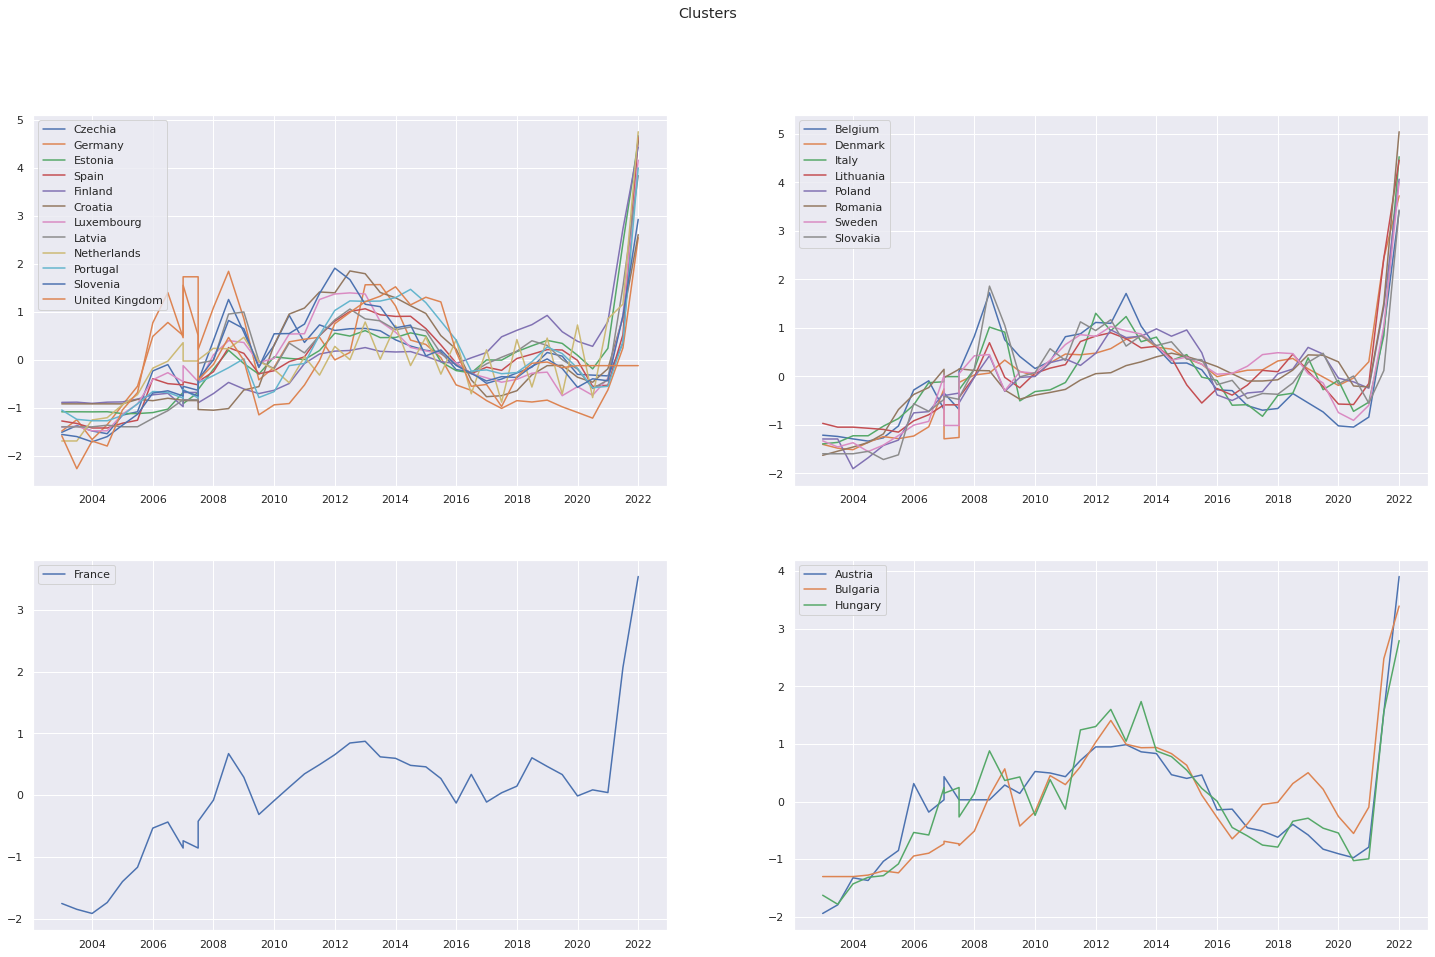

In [41]:
plot_clusters(df, labels)

## R packages

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.0.0
%load_ext rpy2.ipython

In [ ]:
# install r packages
%%R
install.packages("dtwclust", repos = "http://cran.us.r-project.org")
install.packages("dplyr", repos = "http://cran.us.r-project.org")

(as ‘lib’ is unspecified)








In [44]:
# install data as r dataframes
%%R
r_scaled_df <- read.csv("scaled_df.csv")
r_scaled_df <- r_scaled_df[,-1]
series <- as.list(r_scaled_df)

library(dtwclust)


Attaching package: ‘proxy’



    as.dist, dist



    as.matrix





Setting random number generator to L'Ecuyer-CMRG (see RNGkind()).
To read the included vignettes type: browseVignettes("dtwclust").
See news(package = "dtwclust") after package updates.



[1] "softdtw"


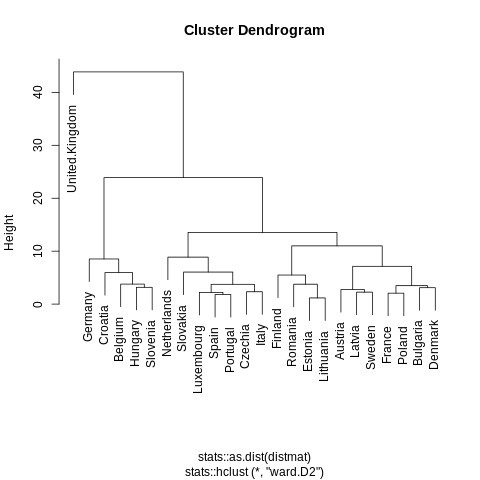

In [45]:
%%R
print("softdtw")
clustering <- tsclust(
      series,
      k = 4L,
      type = "hierarchical",
      distance = "sdtw",
      seed = 42L,
      control =
        hierarchical_control(method = "ward.D2")
    )
plot(clustering)

[1] "dtw"


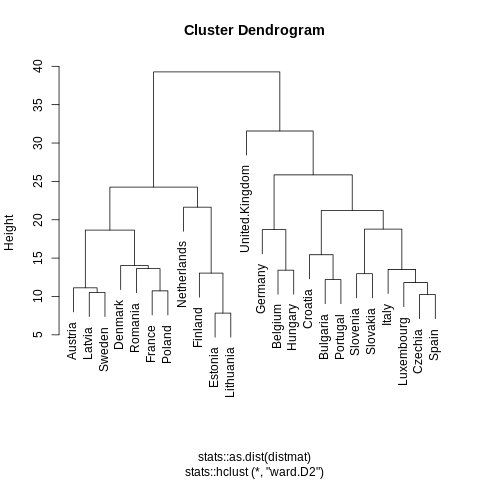

In [46]:
%%R
print("dtw")
clustering <- tsclust(
        series,
        k = 4L,
        type = "hierarchical",
        distance = "dtw",
        seed = 42L,
        control =
          hierarchical_control(method = "ward.D2")
      )
plot(clustering)

[1] "sbd"


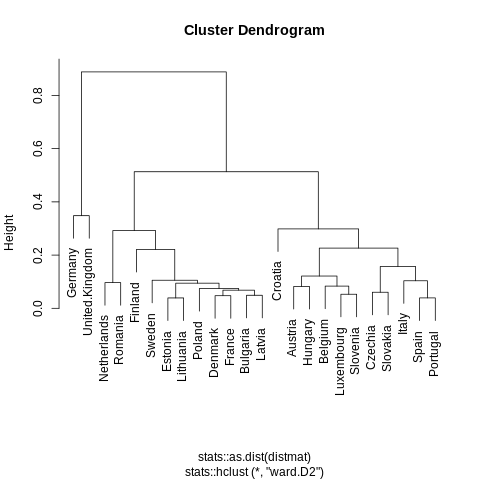

In [47]:
%%R
print("sbd")
clustering <- tsclust(
        series,
        k = 4L,
        type = "hierarchical",
        distance = "sbd",
        seed = 42L,
        control =
          hierarchical_control(method = "ward.D2")
      )
plot(clustering)

In [48]:
# R hierarch clustering metrics
%%R
library(dplyr)
get_metrics <- function(series) {
  k <- 2:8

  method <- c("ward.D2")

  distance = c("sdtw")

  
  hc_par <- tsclust(
    series,
    k = k,
    type = "hierarchical",
    distance = distance,
    seed = 42,
    control = hierarchical_control(method = method),
    args = tsclust_args(dist = list(window.size = 7)),
    trace = TRUE)

  sapply(hc_par, cvi, type = c("Sil", "D", "CH"))
}

get_metrics(series)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union





Calculating distance matrix...
Performing hierarchical clustering...
Extracting centroids...

	Elapsed time is 0.224 seconds.

         [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
Sil 0.7272725 0.3497311 0.2487624 0.2299208 0.2363324 0.2398786 0.2046104
D   0.5593231 0.2081404 0.1722334 0.2387497 0.2436452 0.3367400 0.3929641
CH  5.5552187 5.3694216 6.4049311 7.0983568 6.3684377 6.0893559 5.9658021
